# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования:**
1. Определить сколько времени занимает продажа обьекта недвижимости.
2. Найти какие факторы больше всего влияют на покупку обьектов недвижимости и ее цену.
3. Выявить населенные пункты с самой высокой и низкой стоимостью за 1кв.м. 
4. Обосновать как стоимость объектов зависит от расстояния до центра города.

   **Ход исследования**
   
 Архив данных обьявлений возьму из файла '/datasets/real_estate_data.csv'. О особенностях данных  ничего не известно. Для начала нужно обследовать данные. После чего приступать к выполнению целей.
 Проверю данные на наличие ошибок и определю их влияние на исследование. После чего приступлю к предобработки данных, удалю, заменю и отфильтрую там, где это возможно ошибки, аномалии и редки выбивающиеся значения, которые могут повлечь искажение конечного результата. Далее создадим необходимые столбцы, и приступим к проведению исследовательского анализа данных.
 
 В итоге мое исследование пройдет в семь этапов:
 
   * Обследование данных.
   * Предобработка данных.
   * Расчеты и добавление результатов в таблицу.
   * Определение скорости продаж.
   * Нахождение взаимосвязей основных параметров по стоимости обьекта недвижимости.
   * Проведение анализа для населенных пунктов.
   * Проведение анализа для Санкт-Петербурга.
   * Изложение общего вывода.

### Откройте файл с данными и изучите общую информацию. 

In [6]:
# Импортируем библеотеку pandas и сокращаем название библеотеки для удобства: "pd".
import pandas as pd 
# Разворачиваем все столбцы датафрейма для удобства.
pd.set_option('display.max_columns', None)
# Форматируем числа с плавающей запятой для удобного отображения столбца "last_price".
pd.options.display.float_format = "{0:.2f}".format

In [103]:
#открываем файл, '\t' - используем в качестве разделителя.
path = 'https://code.s3.yandex.net/datasets/'
data = pd.read_csv(path + 'real_estate_data.csv', sep = '\t') 
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00


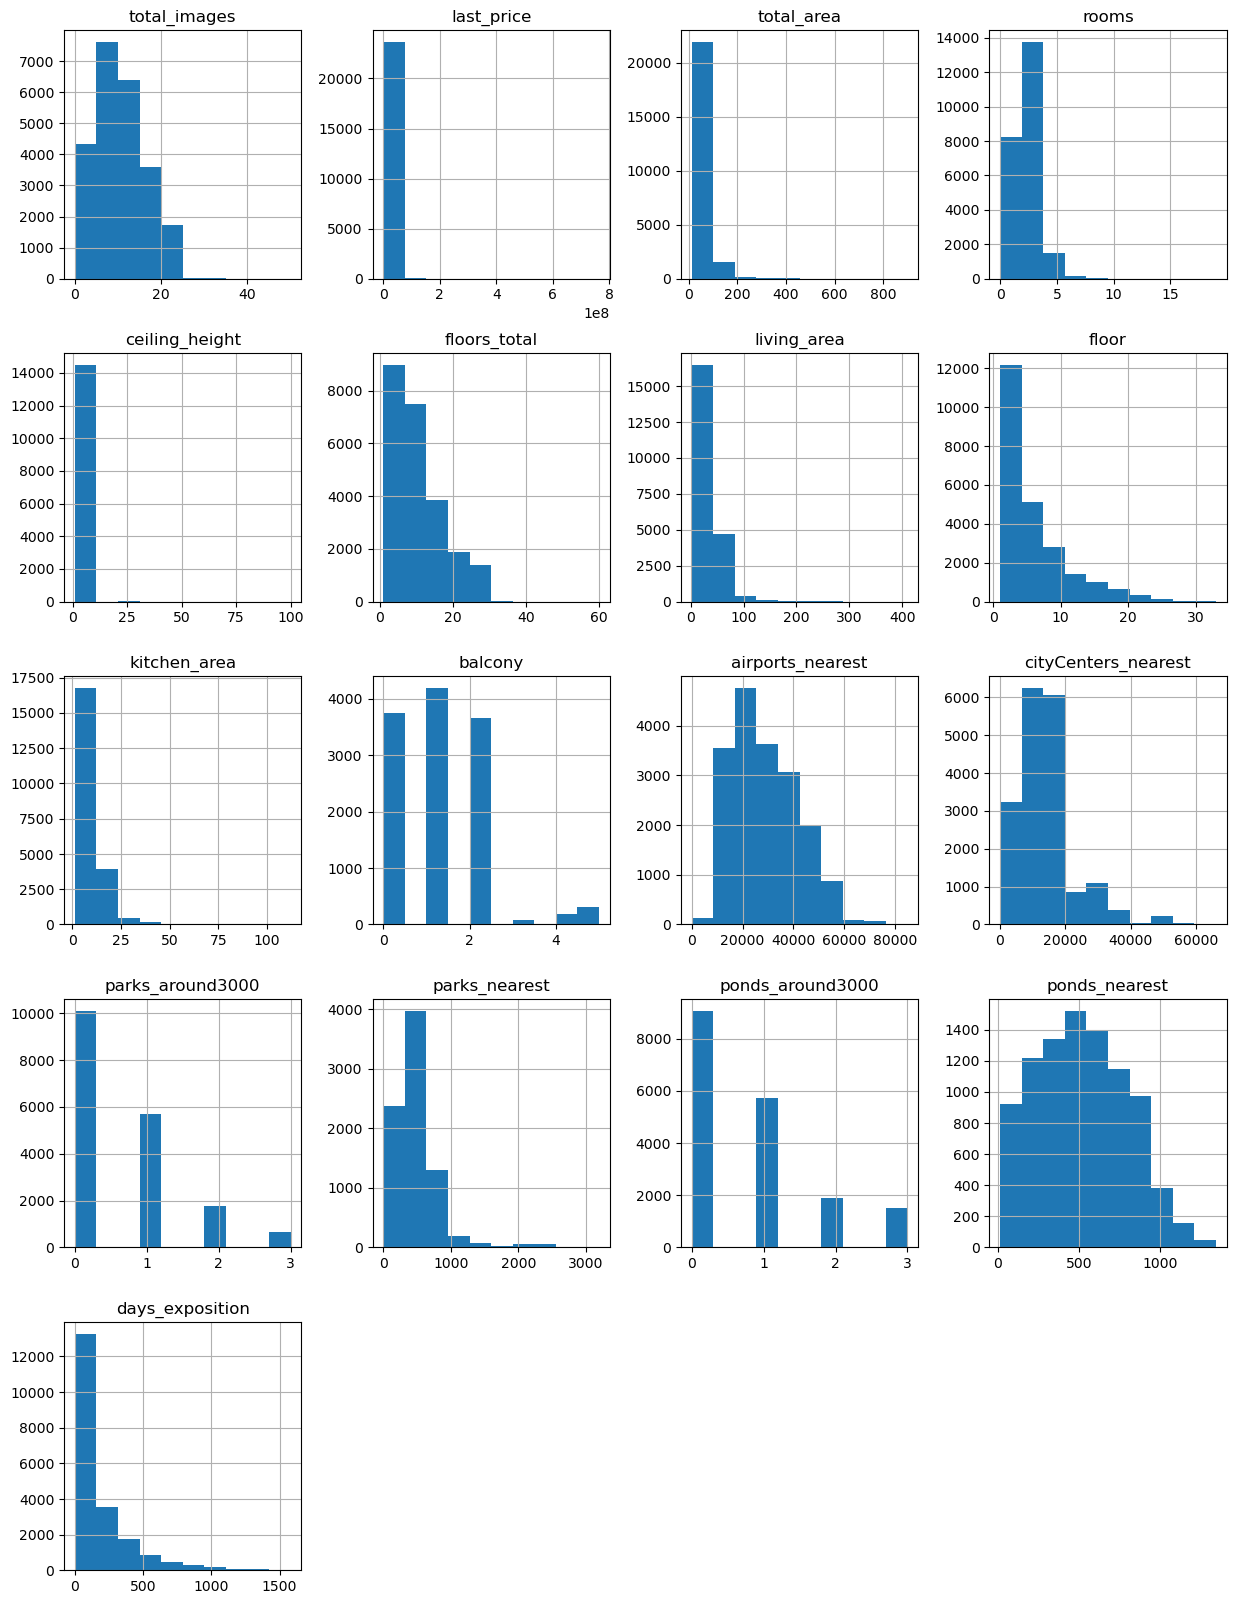

In [10]:
#Cтроим общую гистограмму для всех числовых столбцов таблицы.
data.hist(figsize=(15, 20));


In [11]:
# информация по DataFrame
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Предобработка данных

In [12]:
# Считаем пропуски по столбцам
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
#?data.median # median пропуски не учитывает.
# Заменяем пропуски на медианное значение. 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
print(data['ceiling_height'].head(10))

0   2.70
1   2.65
2   2.65
3   2.65
4   3.03
5   2.65
6   2.65
7   2.65
8   2.65
9   2.50
Name: ceiling_height, dtype: float64


В данном случае разумней всего прировнять пропущенные значения медианной так как высота потолков зависит от года постройки, а также ее архитектурного соображения.

In [14]:
# проверяем произошла ли замена.
data['ceiling_height'].isna().sum()

0

In [15]:
#Заменяем пропущенные значения в столбце всего этажей в доме на значение этажа. 
data.loc[data['floors_total'].isna(),'floors_total'] = data.loc[data['floors_total'].isna(),'floor']
print(data['floors_total'].head(10))

0   16.00
1   11.00
2    5.00
3   14.00
4   14.00
5   12.00
6   26.00
7   24.00
8   27.00
9    9.00
Name: floors_total, dtype: float64


Так мы отбросим нулевые значения и примерно будем понимать количество этажей в обьекте.
По всей видимости данные были пропущенны случайно, от невнимательности или от недостатка информации об обьекте.

In [16]:
#Проверяем получилось ли заменить пропуски.
data['floors_total'].isna().sum()

0

In [17]:
#Группируем жилую площадь по количеству квартир и считаем коэффициент отношения жилой площади к общей.
#С помощью итерации присваиваем пропущенным значениям жилой площади произведение коэффициента на общую плащадь.
group_rooms_mean = data.groupby('rooms')['living_area'].mean()/data.groupby('rooms')['total_area'].mean()
for room in group_rooms_mean.index:
        data.loc[(data['living_area'].isnull()) & (data['rooms'] == room), 'living_area'] = data.loc[(data['living_area'].isnull()) & (data['rooms'] == room), 'total_area'] * group_rooms_mean[room]
group_rooms_mean

rooms
0    0.64
1    0.48
2    0.57
3    0.61
4    0.62
5    0.62
6    0.65
7    0.62
8    0.65
9    0.62
10   0.64
11   0.71
12   0.46
14   0.64
15   0.69
16   0.67
19   0.71
dtype: float64

In [18]:
#Проверяем получилось ли заменить пропуски.
data['living_area'].isna().sum()

0

In [19]:
#Заменяем пропущенные значения апартаментов на False.
data['is_apartment'] = data['is_apartment'].fillna(False)
#Проверяем получилось ли заменить пропуски.
data['is_apartment'].isna().sum()

0

In [20]:
# Берем столбцы, где квартира является студией или апартаментом и приравниваем пропущенные значения исходя из условия нулю.
data.loc[(data['studio'] == True)|(data['is_apartment'] == True), 'kitchen_area'] = \
data.loc[(data['studio'] == True)|(data['is_apartment'] == True), 'kitchen_area'].fillna(0)
data['kitchen_area'].isna().sum()

2114

In [21]:
#Оставшиеся пропуски группируем по комнатам и заменяем пропущенные значения медианным значением.
kitch_area_rooms = data.groupby('rooms')['kitchen_area'].median()
def kitchen_area(rooms):
    return kitch_area_rooms[rooms]
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'rooms'].apply(kitchen_area)
data['kitchen_area'].isna().sum()

0

In [22]:
data = data.dropna(subset = ['locality_name'])
data['locality_name'].isna().sum()

0

Удаляем все строки с неизвестной локацией, так как пропущенных значений мало в сравнении с общим количеством данных.
Где можно сделать вывод о том, что удаленные значения не повлияют на дальнейшее исследование.
Причина не заполнения данных о локации возможно человеческий факт, заполнять данные пропуски не будем.

In [23]:
# Присваиваем пропущенным значениям столбца балконы, значение нуль.
data['balcony'] = data['balcony'].fillna(value = 0)
data['balcony'].isna().sum()

C:\Users\dmitr\AppData\Local\Temp\ipykernel_12808\3224352510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].fillna(value = 0)


0

Пропуск в данном случае указывает на отсутствие балкона.

<div class="alert alert-info"> <b>Комментарии студента:</b>По вашему комментарию, пропуски в столбце количество дней оставил </div>

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Возможные появления пропусков:**

- в столбце is_apartment логический тип данных, тоесть кваритра является апартаментом или нет, что и обьясняет наличие пропусков, пользователь скорее пропускал бы это занчение и не тратил время  на заполнение лишних данных. Так же и со столбцом "studio".
    
- в столбце floors_total, случайные пропуски, человеческий фактор или просто не имеет значение если знаешь номер своего этажа.
    
- в столбце ceiling_height, не каждый человек знает этот параметр, и не каждому это важно при выборе недвижимости. Решая каким способом заполнить этот параметр, было решено выбрать медианное значение, так как оно не должно исказить наше исследование, но для того чтобы точно утверждать какие значения должны быть вместо пропуков нужно знать больше информации о квартире, к примеру год постройки или архитектурное соображение.
    
По большей части пропуски возникали по случайным обстоятельствам и человеческого фактора, а также логического обоснования.

**Найдим столбцы, в которых нужно изменить тип данных**

In [25]:
# Рассмотрим типы данных в каждом столбце
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [26]:
# Преобразуем тип данных в выбранных столбцах.
data['floors_total'] = data['floors_total'].astype(int)
data['floors_total'].dtype

C:\Users\dmitr\AppData\Local\Temp\ipykernel_12808\2684601583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] = data['floors_total'].astype(int)


dtype('int32')

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')
data['first_day_exposition'].dtype

C:\Users\dmitr\AppData\Local\Temp\ipykernel_12808\1327484526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')


dtype('<M8[ns]')

In [28]:
data['balcony'] = data['balcony'].astype('int')
data['balcony'].dtype

C:\Users\dmitr\AppData\Local\Temp\ipykernel_12808\2741027823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].astype('int')


dtype('int32')

In [29]:
#data['days_exposition'] = data['days_exposition'].astype('Int64')

In [30]:
# Данный столбец вещественного типа, точка мешает для просмотра. Преобразуем в целочисленный.
data['last_price'].unique()
data['last_price'] = data['last_price'].astype('int')
data['last_price'].dtype

C:\Users\dmitr\AppData\Local\Temp\ipykernel_12808\578992751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_price'] = data['last_price'].astype('int')


dtype('int32')

**Причины изменения типа данных:**
    
- в столбце 'first_day_exposition', изначально тип данных object, так как это дата побликации ее нужно изменить в тип данных datetime;
    
- столбец 'floors_total', является вещественным числом, этажей не может быть полтора, поэтому преобразуем этот столбец в целочисленный тип;

- столбец 'balcony', не могут быть вещественным числом.
    
- столбец 'last_price', данный столбец вещественного типа, точка мешает для просмотра. Преобразуем в целочисленный.

**Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты**

In [31]:
# Находим уникальные значения в столбце 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [32]:
# Устраняем неявные дубликаты, создаем список из локаций, итерацией проходим по каждому значению из списка,
# где заменяем их пробелом, затем пробел убираем. Замену сохраняем в уже существующем столбце.
locations = ['посёлок', 'городской посёлок', 'деревня', 'поселок', 'городского типа', 'городского типа', 'садовое товарищество',\
           'село', 'городской', 'садоводческое некоммерческое товарищество', 'имени',\
           'при железнодорожной', 'станции', 'коттеджный', 'коттеджный']
empty = ' '
for location in locations:
    data['locality_name'] = data['locality_name'].str.replace(location, empty, regex = True).str.strip()

C:\Users\dmitr\AppData\Local\Temp\ipykernel_12808\24562769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'] = data['locality_name'].str.replace(location, empty, regex = True).str.strip()


In [33]:
# Проверяем замену.
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

**Найдем и устраним редкие и выбивающиеся значения**

In [34]:
# Добавляем библеотеку для построение диаграмм размаха.
import matplotlib.pyplot as plt

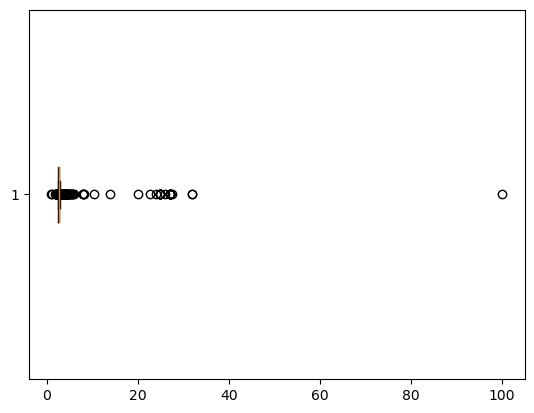

In [35]:
# Для наглядности построим диаграмму размаха для столбца высоты потолка, нормальная часть значений лежит в зоне 2.5 до 3.6.
plt.boxplot(data['ceiling_height'], vert = False)
plt.ylim = (0,100)

In [36]:
# Отсортируем по убыванию столбец высот потолков. Видим, что есть слишком большие выбывающиеся значения, такие как 100, 32, 27, 25. 
# Скорее всего это опечатка и нужно их привести к вещественному значению.
data.sort_values('ceiling_height', ascending=False).head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.00,2018-07-25,1,100.00,5,14.00,5,True,False,False,11.00,5,Санкт-Петербург,34963.00,8283.00,1.00,223.00,3.00,30.00,19.00
3148,14,2900000,75.00,2018-11-12,3,32.00,3,53.00,2,False,False,False,8.00,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000,92.40,2019-04-05,2,32.00,6,55.50,5,False,False,False,16.50,4,Санкт-Петербург,18838.00,3506.00,0.00,NaN,3.00,511.00,NaN
21377,19,4900000,42.00,2017-04-18,1,27.50,24,37.70,19,False,False,False,11.00,2,Санкт-Петербург,42742.00,9760.00,0.00,NaN,0.00,NaN,61.00
17857,1,3900000,56.00,2017-12-22,3,27.00,5,33.00,4,False,False,False,9.50,0,Санкт-Петербург,41030.00,15543.00,0.00,NaN,0.00,NaN,73.00
5246,0,2500000,54.00,2017-10-13,2,27.00,5,30.00,3,False,False,False,9.00,2,Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00
20478,11,8000000,45.00,2017-07-18,1,27.00,4,22.00,2,False,False,False,10.00,1,Санкт-Петербург,18975.00,3246.00,0.00,NaN,3.00,449.00,429.00
21824,20,2450000,44.00,2019-02-12,2,27.00,2,38.00,2,False,False,False,8.60,2,Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10773,8,3800000,58.00,2017-10-13,2,27.00,10,30.10,3,False,False,False,8.10,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.00
4876,7,3000000,25.00,2017-09-27,0,27.00,25,17.00,17,False,False,True,0.00,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.00


In [37]:
# Посмотрим на числовое описание данных, берем столбец высота потолков,
# где видим, что максимальное значение высоты 100м, странное значение которое нужно отфильтровать.
data['ceiling_height'].describe()

count   23650.00
mean        2.72
std         0.99
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

In [38]:
#Если отталкиваться от стандартных значений таких как 
#«сталинки» — от 3 до 3,6 м;
#«хрущевки» — 2,5 м, реже — 2,7 м;
#«брежневки» — 2,6–2,7 м;
#панельные и блочные дома — 2,5–2,7 м;
#так же могут быть и частные дома, с нестандартной планировкой и архитектурой.
#Можно сделать вывод, что в нашем столбце имеются редкие и выбивающиеся значения.(100, 32, 27, 25.)
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [39]:
# Устраните редкие и выбивающиеся значения.
# Применим цикл, в теле которого функция в которую зададим условия на возврат и применим в уже существующий столбец.
def ceiling_height (ceil):
    if  ceil > 20:
        return ceil / 10
    else: 
        return ceil
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height)

C:\Users\dmitr\AppData\Local\Temp\ipykernel_12808\1550751591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height)


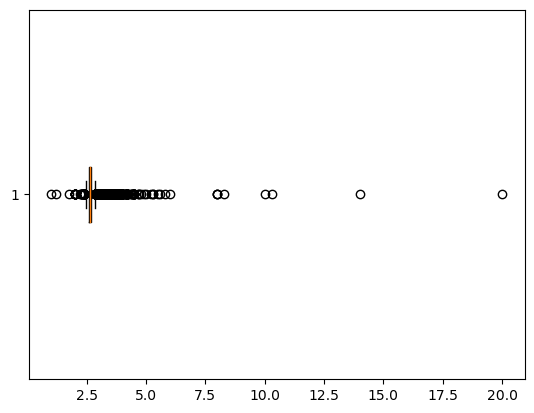

In [40]:
#На диаграмме ящик с усами видим, что есть значения выбивающиеся от 2.4 до 1 и от 3.6 до 20м.
plt.boxplot(data['ceiling_height'], vert = False)
plt.xlim = (0,1000)

In [41]:
# Отфильтруем эти значения.
data = data[(data['ceiling_height'] < 3.6)]
data = data[(data['ceiling_height'] > 2.4)]

count   23364.00
mean        2.69
std         0.18
min         2.45
25%         2.60
50%         2.65
75%         2.70
max         3.59
Name: ceiling_height, dtype: float64

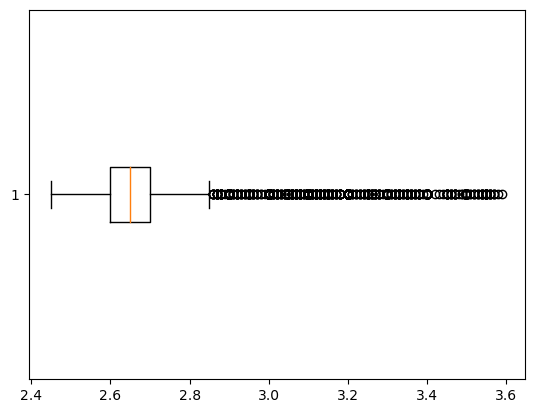

In [42]:
# Видим что большая часть значений лежит в диапозоне до 2.7, выглядит хорошо, аномальные значения убрали.
plt.boxplot(data['ceiling_height'], vert = False)
plt.xlim = (0,10)
data['ceiling_height'].describe()

In [43]:
# Стобец последняя цена, оставляем как есть, так как нестандартных больших и маленьких значений мало, и так же это может быть единичная особенность.
# недвижимость с большой стоимостью могут быть большими коттеджными,
# а с маленькой стоимостью недвижимость может распологаться в дали от городов, где цена намного меньше (поселки, деревни), цена за недвижимость как 12190 возможно опечатка, человеческий фактор, такое значение еденичное, оставляем как есть,
#data.sort_values('last_price', ascending=False).head(10)
data.sort_values('last_price', ascending=True).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00
17456,7,430000,30.40,2019-04-22,1,2.65,2,16.00,1,False,False,False,6.00,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000,54.00,2018-06-26,2,2.65,3,30.68,3,False,False,False,8.78,0,Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00
16274,18,440000,40.00,2018-07-10,1,2.65,5,19.01,1,False,False,False,9.00,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.00
17676,0,450000,36.50,2018-02-01,1,2.65,5,17.30,4,False,False,False,8.50,1,Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.00
16219,14,450000,38.50,2018-07-11,2,2.65,2,21.88,1,False,False,False,8.78,0,Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.00
9581,7,450000,43.40,2018-08-31,2,2.65,5,30.30,3,False,False,False,5.50,0,Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.00
5698,7,450000,42.00,2017-07-31,2,2.65,1,23.00,1,False,False,False,5.80,0,Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.00
23484,11,470000,44.50,2018-07-02,2,2.65,2,28.00,2,False,False,False,7.50,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,298.00
21912,0,470000,37.00,2018-02-18,1,2.65,3,17.59,3,False,False,False,9.00,0,Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.00


count       23364.00
mean      6382824.02
std      10398685.73
min         12190.00
25%       3400000.00
50%       4600000.00
75%       6700000.00
max     763000000.00
Name: last_price, dtype: float64

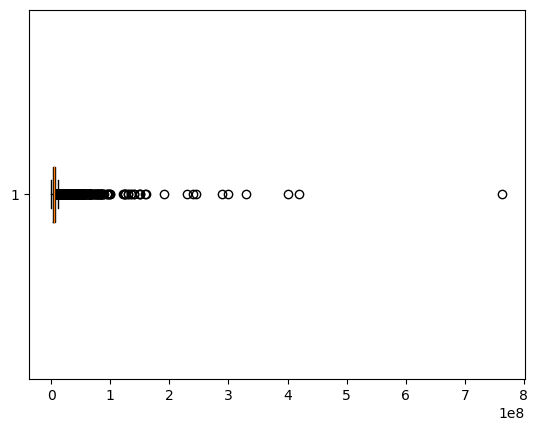

In [44]:
# Все равно проверим столбец цены.
#Есть выбывающие значения, но их не много.
plt.boxplot(data['last_price'], vert = False)
plt.xlim = (0,10)
data['last_price'].describe()

count      22697.00
mean     5374884.42
std      3150982.65
min       430000.00
25%      3400000.00
50%      4530000.00
75%      6450000.00
max     19999000.00
Name: last_price, dtype: float64

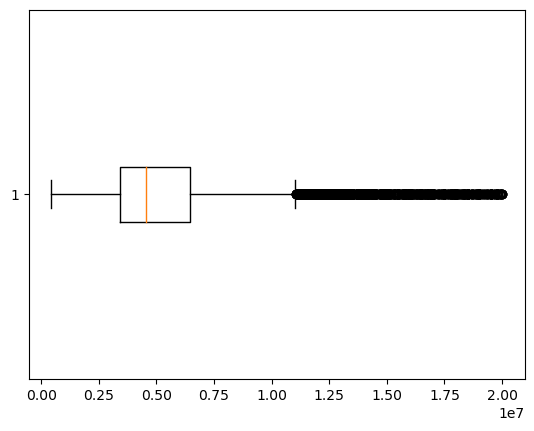

In [45]:
# Отфильтруем выбывающие значения, 
data = data[(data['last_price'] < 20000000)]
data = data[(data['last_price'] > 15000)]
plt.boxplot(data['last_price'], vert = False)
plt.xlim = (0,1000)
data['last_price'].describe()

count   22697.00
mean       56.40
std        24.28
min        12.00
25%        39.80
50%        50.94
75%        67.00
max       320.00
Name: total_area, dtype: float64

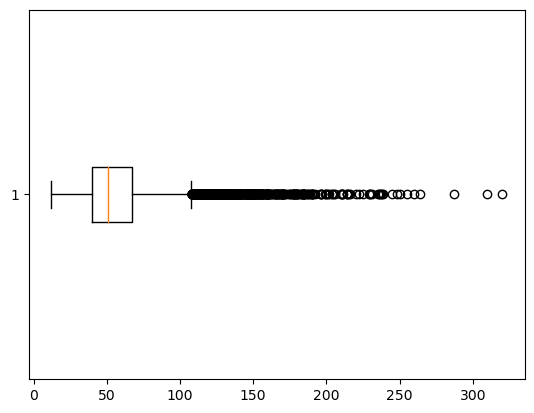

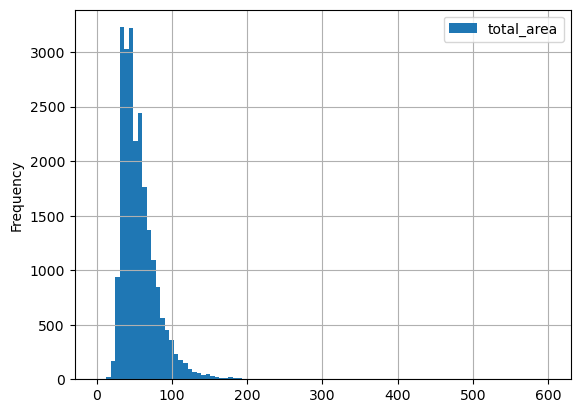

In [46]:
# Построим "ящик с усами" для столбца общая площадь. Видим, что нормальные значения лежат от 40 до 69.
plt.boxplot(data['total_area'], vert = False)
plt.xlim = (0,1000)
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid = True, range = (1,600))
data['total_area'].describe()

count   22656.00
mean       56.10
std        23.15
min        13.00
25%        39.80
50%        50.80
75%        67.00
max       199.20
Name: total_area, dtype: float64

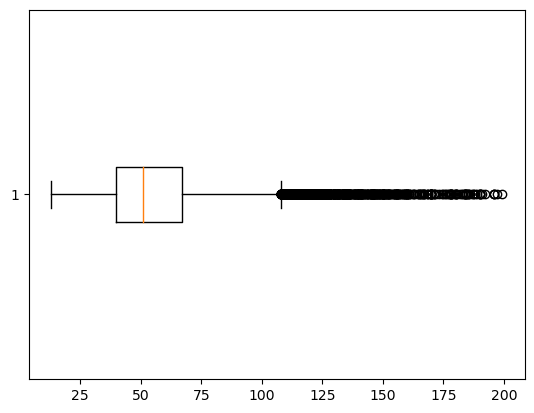

In [47]:
# Отфильтруем выбывающие значения, от 20 и выше, и от 0 до 12, так как таких обьектов мало, и такие площадя редкость.
data = data[(data['total_area'] < 200)]
data = data[(data['total_area'] > 12)]
plt.boxplot(data['total_area'], vert = False)
plt.xlim = (0,1000)
data['total_area'].describe()

count   22656.00
mean        2.00
std         0.96
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        11.00
Name: rooms, dtype: float64

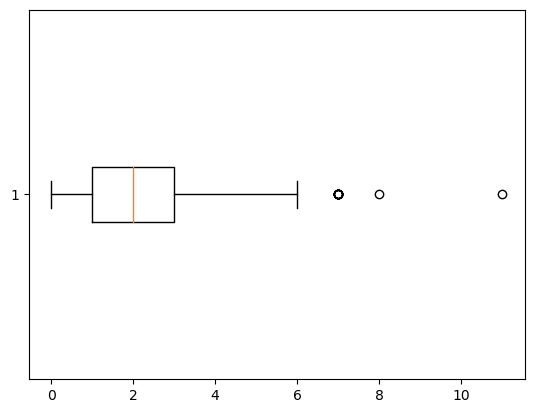

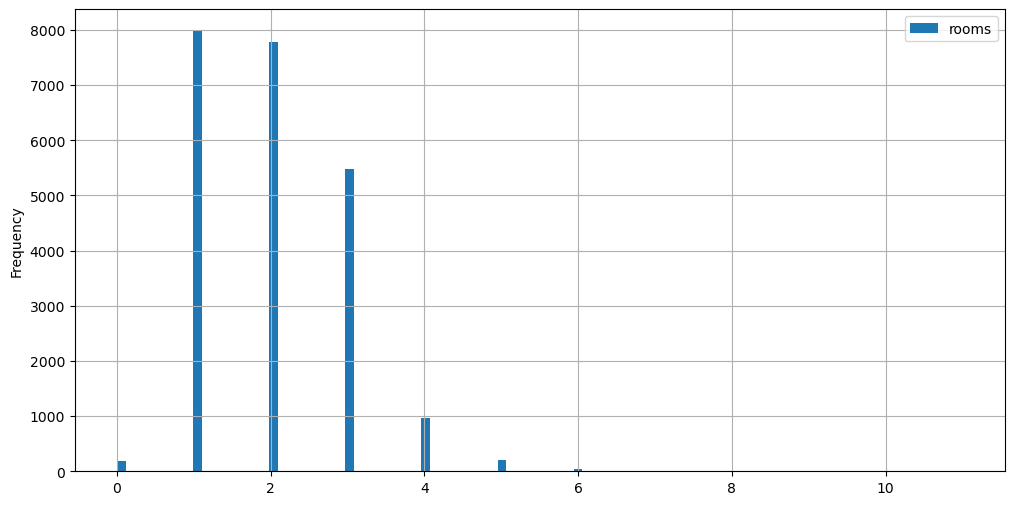

In [48]:
# Построим диаграмму для столбца комнаты, такие значения как 0 не может быть, хотя если говорить о студиях и апартаментах, то в целом может, 
# так как в таких обьектах нет перегородок разделяющих площадь на комнаты.
# Рассмотрим диаграмму, есть одиночные выбросы, отфильтруем их.
# Нормальные значения лежат в диапозоне от 1 до 3 комнат, остальные же могут зависить от обьема площади, и архетектурного соображения.
# Так же минимальное значение 0, построим гистограмму, где видно, что значение равно 0.1.
plt.boxplot(data['rooms'], vert = False)
plt.xlim = (0,100)
data.plot(y = 'rooms', kind = 'hist', bins = 100, grid = True, figsize = (12, 6))
data['rooms'].describe()

count   22447.00
mean        2.01
std         0.94
min         1.00
25%         1.00
50%         2.00
75%         3.00
max         6.00
Name: rooms, dtype: float64

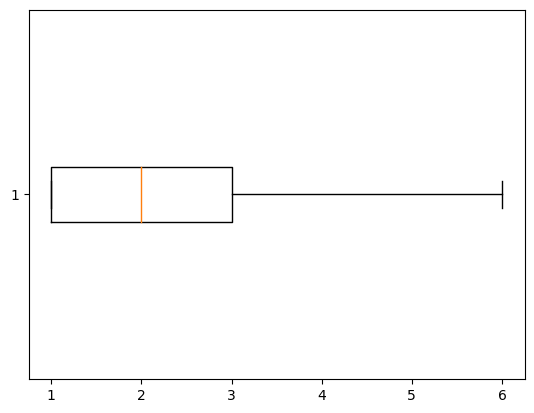

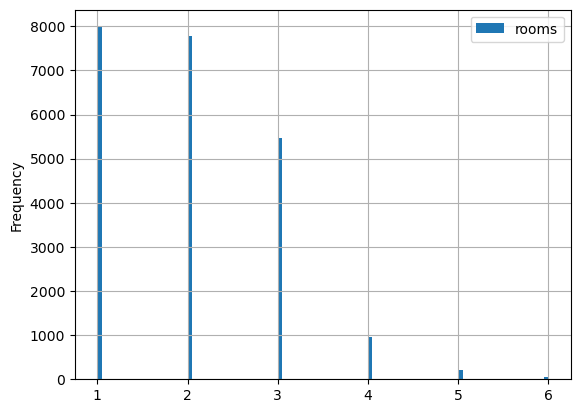

In [49]:
# Фильтруем минимально редкое значение в зоне нуля. И првоерям наглядно что получилось. 
data = data[(data['rooms'] > 0.1)]
data = data[(data['rooms'] <= 6)]
plt.boxplot(data['rooms'], vert = False)
data.plot(y = 'rooms', kind = 'hist', bins = 100, grid = True)
data['rooms'].describe()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22447 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22447 non-null  int64         
 1   last_price            22447 non-null  int32         
 2   total_area            22447 non-null  float64       
 3   first_day_exposition  22447 non-null  datetime64[ns]
 4   rooms                 22447 non-null  int64         
 5   ceiling_height        22447 non-null  float64       
 6   floors_total          22447 non-null  int32         
 7   living_area           22447 non-null  float64       
 8   floor                 22447 non-null  int64         
 9   is_apartment          22447 non-null  bool          
 10  studio                22447 non-null  bool          
 11  open_plan             22447 non-null  bool          
 12  kitchen_area          22447 non-null  float64       
 13  balcony         

<AxesSubplot:xlabel='days_exposition'>

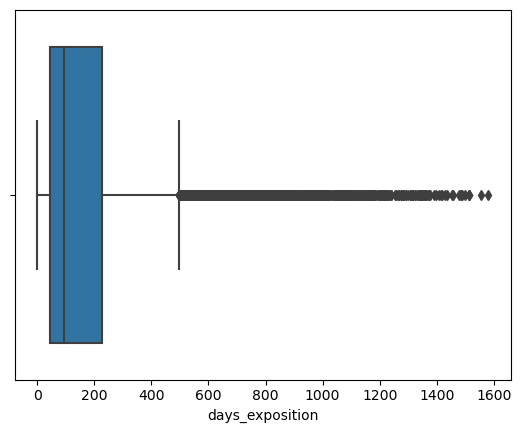

In [51]:
#Построим ящик по столбцу количество дней с начала публикации и посмотрим на выбывающие значения.
import seaborn as sns
sns.boxplot(data = data, x = 'days_exposition')

count   19543.00
mean      177.89
std       216.50
min         1.00
25%        45.00
50%        94.00
75%       226.00
max      1580.00
Name: days_exposition, dtype: float64

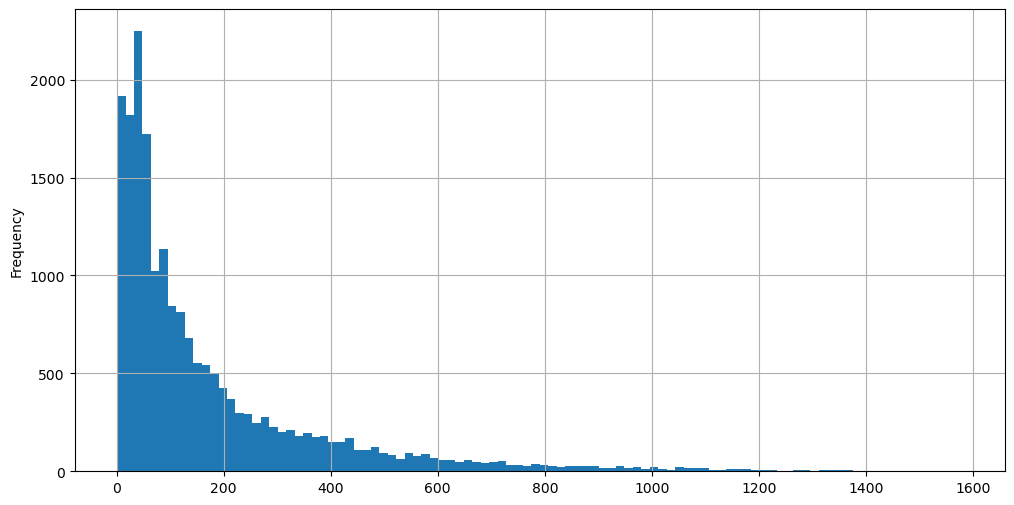

In [52]:
data['days_exposition'].plot(kind = 'hist', bins = 100, grid = True, figsize = (12, 6))
data['days_exposition'].describe()

count   19002.00
mean      177.33
std       204.71
min         6.00
25%        45.00
50%        97.00
75%       229.00
max      1199.00
Name: days_exposition, dtype: float64

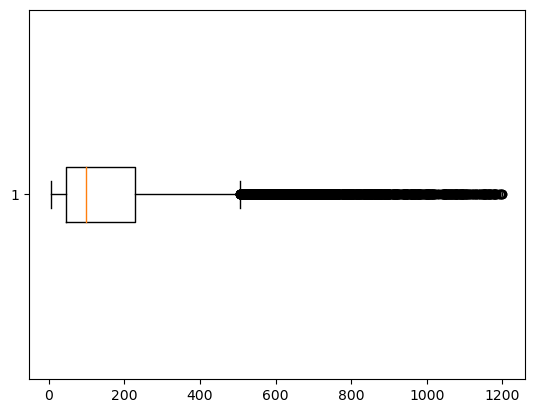

In [53]:
# Отфильтруем данные по периоду размещения обьявления меньше 5, и больше 1200 так как эти значения могут искажать исследование.
# И посмотрим изменения. Медианное значение 98, продажи в этой зоне больше всего.
data = data[(data['days_exposition'] > 5)]
data = data[(data['days_exposition'] < 1200)]
plt.boxplot(data['days_exposition'], vert = False)
plt.xlim = (0,100)
data['days_exposition'].describe()

count   19002.00
mean       31.62
std        15.34
min         2.00
25%        18.21
50%        29.55
75%        40.00
max       159.60
Name: living_area, dtype: float64

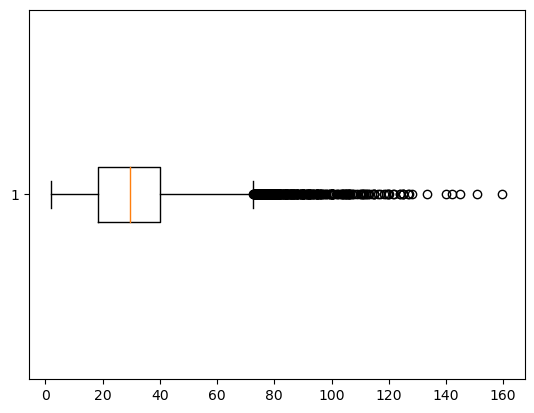

In [54]:
# Построим диаграмму размаха для жилой площади.
plt.boxplot(data['living_area'], vert = False)
plt.xlim = (0,100)
data['living_area'].describe()

count   18954.00
mean       31.46
std        14.80
min         8.18
25%        18.21
50%        29.50
75%        40.00
max       108.82
Name: living_area, dtype: float64

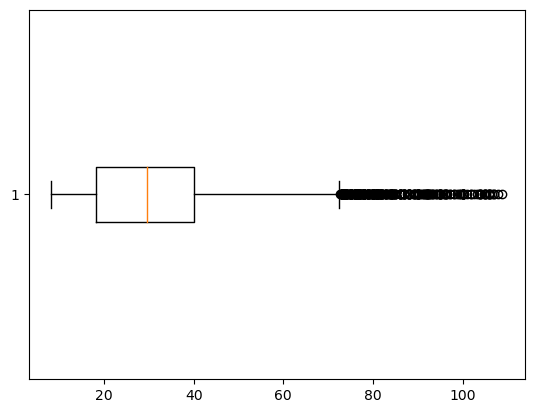

In [55]:
#Аномально выбывающие значения в зоне от 110 до 140, офильруем их, и проверем стоит ли отбрасовать эти значения.
# По данным из https://dzen.ru/a/Y9tfAj4ckUQvaQSk жилая площадь минимальная 8, составим ~ пороги.
data = data[(data['living_area'] > 8)]
data = data[(data['living_area'] < 110)]
plt.boxplot(data['living_area'], vert = False)
plt.xlim = (0,100)
data['living_area'].describe()

count   18954.00
mean        9.88
std         4.21
min         0.00
25%         7.10
50%         9.00
75%        11.00
max        64.00
Name: kitchen_area, dtype: float64

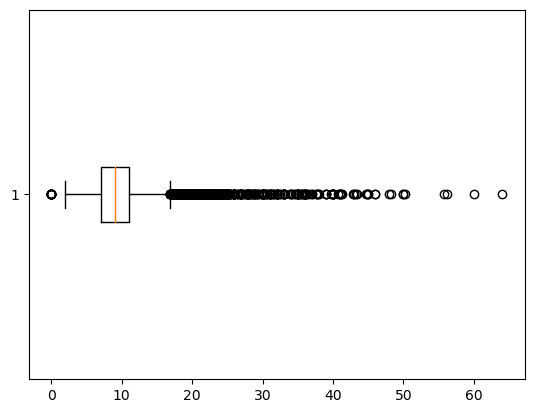

In [56]:
# Построим диаграмму размаха для кухни.Видим, что есть выбывающие значения в зоне минимального значения и редкие значения в зоне от 37.
# Остались еще редкие значения но чтобы не срезать нудную информацию оставим как есть.
plt.boxplot(data['kitchen_area'], vert = False)
plt.xlim = (0,100)
data['kitchen_area'].describe()

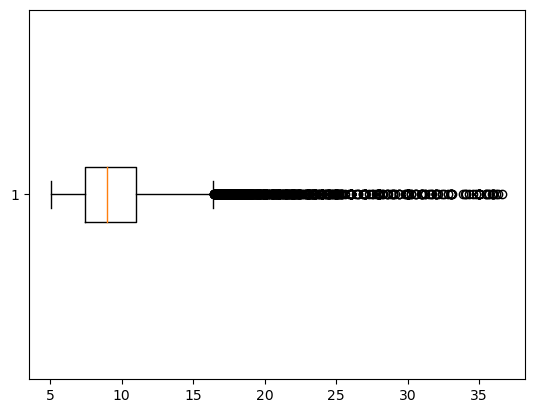

In [57]:
# Остались еще редкие значения но чтобы не срезать нудную информацию оставим как есть.
data = data[(data['kitchen_area'] > 5)]
data = data[(data['kitchen_area'] < 37)]
plt.boxplot(data['kitchen_area'], vert = False)
plt.xlim = (0,100)

In [58]:
# Составим датафрейм по каждому столбцу требующих обработки аномальний, и зададим агрегатные функции.
# Посмотрим на результат устранения аномальных значений.
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00"
min,1.00,13.00,2.45,6.00,"430,000.00",8.18,5.06,1.00,1.00
max,6.00,197.00,3.59,"1,199.00","19,999,000.00",108.82,36.60,33.00,60.00
median,2.00,50.20,2.65,97.00,"4,500,000.00",29.60,9.00,5.00,9.00


In [59]:
# Или так, чтобы было видно квартили
data.describe().style.format("{:,.2f}")

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","18,504.00","14,192.00","14,209.00","14,209.00","6,005.00","14,209.00","6,898.00","18,504.00"
mean,9.59,"5,231,411.04",55.41,1.97,2.67,11.02,31.51,6.05,9.92,0.60,"29,043.98","14,617.37",0.57,494.98,0.73,527.07,177.08
std,5.58,"2,905,543.53",21.70,0.92,0.16,6.66,14.85,4.98,3.82,0.95,"12,859.59","8,361.55",0.77,347.08,0.91,275.21,204.40
min,0.00,"430,000.00",13.00,1.00,2.45,1.00,8.18,1.00,5.06,0.00,0.00,287.00,0.00,1.00,0.00,13.00,6.00
25%,6.00,"3,400,000.00",39.68,1.00,2.60,5.00,18.20,2.00,7.40,0.00,"18,398.00","10,250.00",0.00,288.00,0.00,314.00,45.00
50%,9.00,"4,500,000.00",50.20,2.00,2.65,9.00,29.60,5.00,9.00,0.00,"27,263.00","13,373.00",0.00,456.00,0.00,513.00,97.00
75%,13.00,"6,256,250.00",65.90,3.00,2.70,16.00,40.00,8.00,11.00,1.00,"37,715.00","16,518.00",1.00,619.00,1.00,733.00,229.00
max,42.00,"19,999,000.00",197.00,6.00,3.59,60.00,108.82,33.00,36.60,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,199.00"


In [60]:
# Проверяем датаcет на наличие явных дубликатов
data.duplicated().sum()

0

In [61]:
# Очистим датасет от явных дубликатов
data = data.drop_duplicates()

**На данном этапе проекта мы произвели обработку датафрейма от аномальных значений.**

Обработка заключалась в следующем:

- отбрасывании значений, содержащие пропущенные значения, это решение подходило только в случае, если недостающие данные не являются информативными, также ошибка при вводе или человеческий фактор.
- изучение уникальных значения в столбце с названиями локаций, дало понять, что имеются дублирующие названия населенных пунктов, которые мы удалили не тронув основные наименования населенных пунктов.
- отбрасывание значений, которые являлись выбросами, выбивающиеся из границ "ящика с усами" и то не все значения, а лишь основная часть которая выделялась в види слишком маленьких значений или слишком больших, причину которых можно обосновать логически.
- В данном датасете присутствовали странные нестандартные значения, такие как высота потолков 100 метров или 1 метр, стоимость квартиры 12 тыс и 763 миллиона. Много нулевых значений мы их сочли за ошибку. Отстутствие комнат, такое может быть если говорить о студиях и апартаментах, но таких значений еденичные случаи. 900 кв.м тоже выбивающие значение, которое не обосновать. Вообщем, что касается качество исходных данных, то мы устранили много повторяющихся значений например как в столбце населенные пункты. Убрали лишнии диапазоны значений не в ходящие в обоснование, заменили пропущенные значения в столбце количества комнат, так как скорее всего это нуль так как это пропуск из-за человеческого фактора. 
- В исходных данных много ошибок и неадекватных значений.


### Посчитайте и добавьте в таблицу новые столбцы

**Цена одного квадратного метра**

In [62]:
# Добавляем новый столбец в датафрейм, для нахождения цены за один квадратный метр, берем последнюю цену и делим ее на общую площадь в кв.м.
data['price_sqr_m'] = data['last_price'] / data['total_area']
data['price_sqr_m']

1        82920.79
2        92785.71
5        95065.79
6        99195.71
8        87454.76
           ...   
23691   129903.98
23692    45000.00
23693    73717.95
23695    52542.37
23697   149511.40
Name: price_sqr_m, Length: 18504, dtype: float64

**День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)**

In [63]:
# Добавляем новый столбец в датафрейм, определяем день недели, используя метод dt.weekday() он возвратит день недели в виде целого числа.
data['day_week_publ'] = data['first_day_exposition'].dt.weekday
data['day_week_publ'].unique()

array([1, 3, 0, 2, 6, 5, 4], dtype=int64)

**Месяц публикации объявления**

In [64]:
# Добавляем новый столбец в датафрейм, методом dt.month он возвратит месяц в виде целого числа от 1 до 12.
data['month_publ'] = data['first_day_exposition'].dt.month
data['month_publ'].unique()

array([12,  8,  9, 11,  5,  2,  6,  7,  1,  3,  4, 10], dtype=int64)

**Год публикации объявления**

In [65]:
# Добавляем новый столбец в датафрейм, определяем год, используя метод dt.year он возвратит год в виде целого числа.
data['yers_publ'] = data['first_day_exposition'].dt.year
data['yers_publ'].unique()

array([2018, 2015, 2017, 2016, 2019, 2014], dtype=int64)

**Тип этажа квартиры (значения — «‎первый», «последний», «другой»)**

In [66]:
# Добавляем новый столбец, сортируем его по возростанию,
# создаем функцию, в тело функции задаем условие, где каждый этаж сравнивается по этажу с индексом.
data['floor_type'] = data['floor']
data['floor_type'] = data['floor_type'].sort_values(ascending = True)
#for floor in range(len(data['floor_type'])): Можно было с помощью цикла пройтись, но использовал apply.
def floor_type(floor):
    if floor == data['floor_type'].loc[data.index[0]]:
        return 'первый'
    elif floor == data['floor_type'].loc[data.index[-1]]:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data['floor_type'].apply(floor_type)   
data['floor_type']

1           первый
2           другой
5           другой
6           другой
8           другой
           ...    
23691       другой
23692       другой
23693       другой
23695       другой
23697    последний
Name: floor_type, Length: 18504, dtype: object

**Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).**

In [67]:
# Добавили новый столбец, где перевели еденицу измерения в метры, и округлили значения в большую сторону методом round().
data['city_сent_km'] = (data['cityCenters_nearest'] / 1000).round()
data['city_сent_km']

1       19.00
2       14.00
5         NaN
6       19.00
8         NaN
         ... 
23691    4.00
23692     NaN
23693   34.00
23695     NaN
23697   10.00
Name: city_сent_km, Length: 18504, dtype: float64

In [68]:
# Выведем новые добавленные столбцы
data[['price_sqr_m', 'day_week_publ', 'month_publ', 'yers_publ', 'floor_type', 'city_сent_km']]

,price_sqr_m,day_week_publ,month_publ,yers_publ,floor_type,city_сent_km
1,82920.79,1,12,2018,первый,19.00
2,92785.71,3,8,2015,другой,14.00
5,95065.79,0,9,2018,другой,NaN
6,99195.71,3,11,2017,другой,19.00
8,87454.76,2,5,2018,другой,NaN
...,...,...,...,...,...,...
23691,129903.98,3,10,2016,другой,4.00
23692,45000.00,4,7,2017,другой,NaN
23693,73717.95,4,8,2016,другой,34.00
23695,52542.37,0,1,2018,другой,NaN


### Проведите исследовательский анализ данных

**Изучим следующие параметры объектов:**

<AxesSubplot:title={'center':'floors_total'}, xlabel='floor_type', ylabel='last_price'>

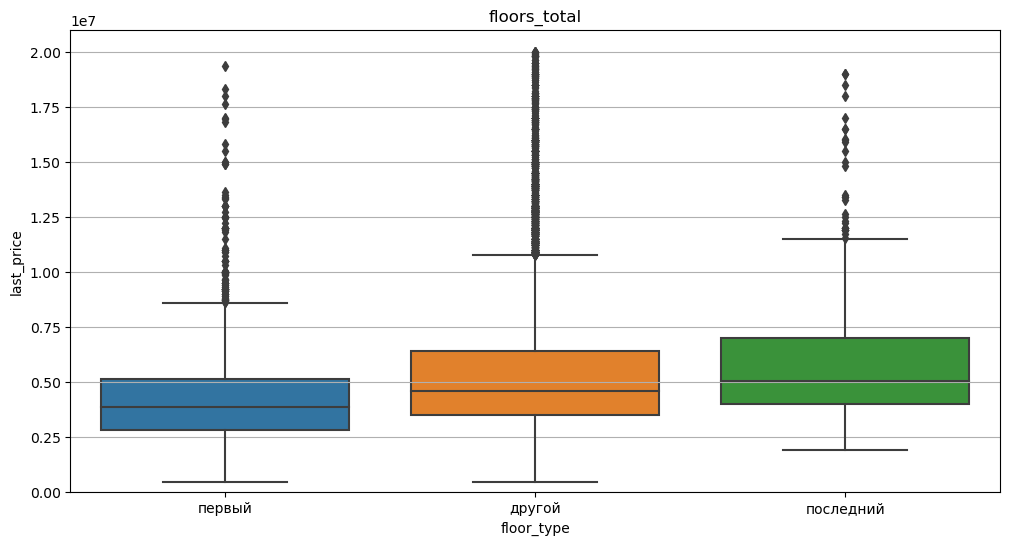

In [69]:
# Так как в предыдущем задании мы создавали, функцию и задавали ей текстовый тип, то в этом случае по совету преподователя, 
# был выбран такой метод построения гистограммы цен для последних этажей.
import seaborn as sns
data.hist('floors_total', bins = 100, figsize = (12,6))
sns.boxplot(data = data, y ='last_price', x ='floor_type')

* График по типу этажа, указывает на то, что обьекты недвижимости  на первом и  на последнем этаже дешевле чем на других.

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

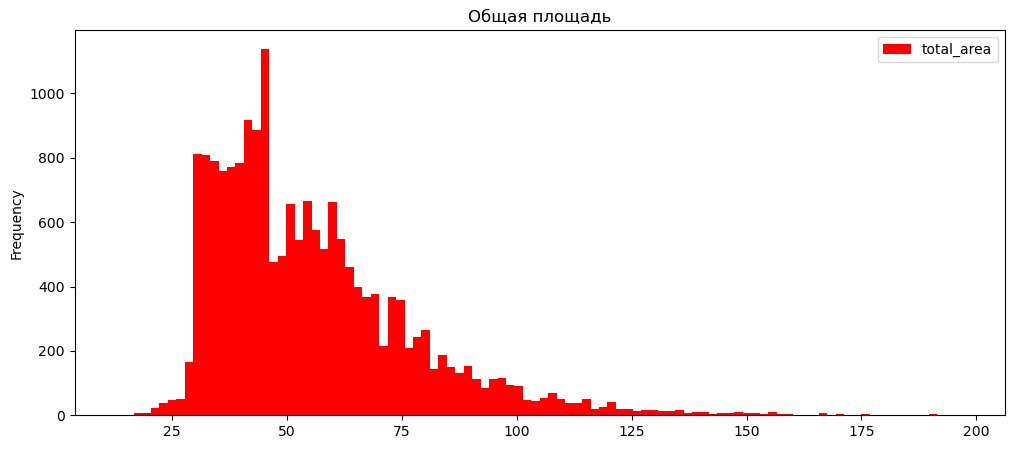

In [70]:
data['total_area'].plot(kind = 'hist', bins = 100, figsize = (12,5), title = 'Общая площадь', legend = 'total_area', color = 'red')

- По общей площади можно сказать, что распределение данных нормальное Гауса, диапозон выборки от 17 до 200 м2, медианное значение 51, среднее 56.

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

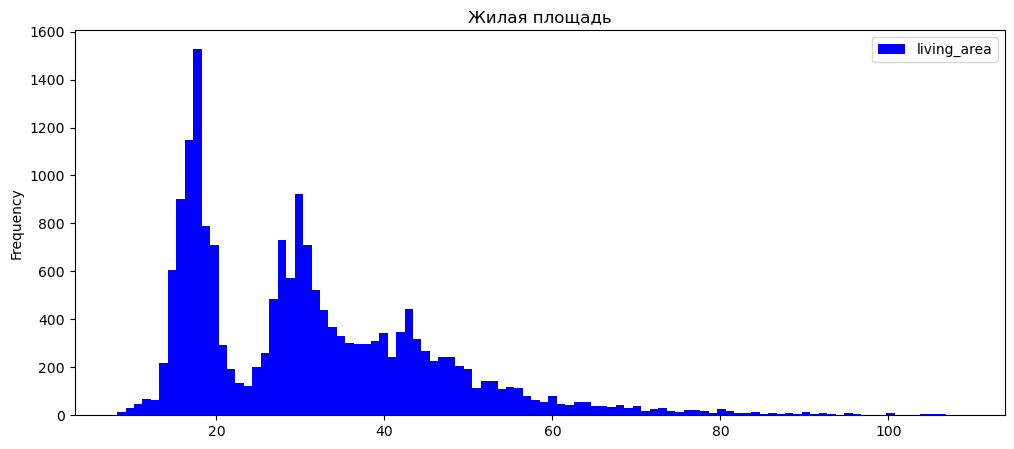

In [71]:
data['living_area'].plot(kind = 'hist', bins = 100, figsize = (12,5), title = 'Жилая площадь', legend = 'living_area', color = 'blue')

- График по жилой площади, указывает на то что есть падение в зоне 23 кв.м, но потом поднимается до зоны 33 кв.м и сходит в большие значения площадей, где можно сделать вывод, что это распределении нормальное Гауса.
Общий диапазон площади от 8 до 110 кв.м., среднее значение 33, а медианное 30.

<AxesSubplot:title={'center':'Стоимость обьекта'}, ylabel='Frequency'>

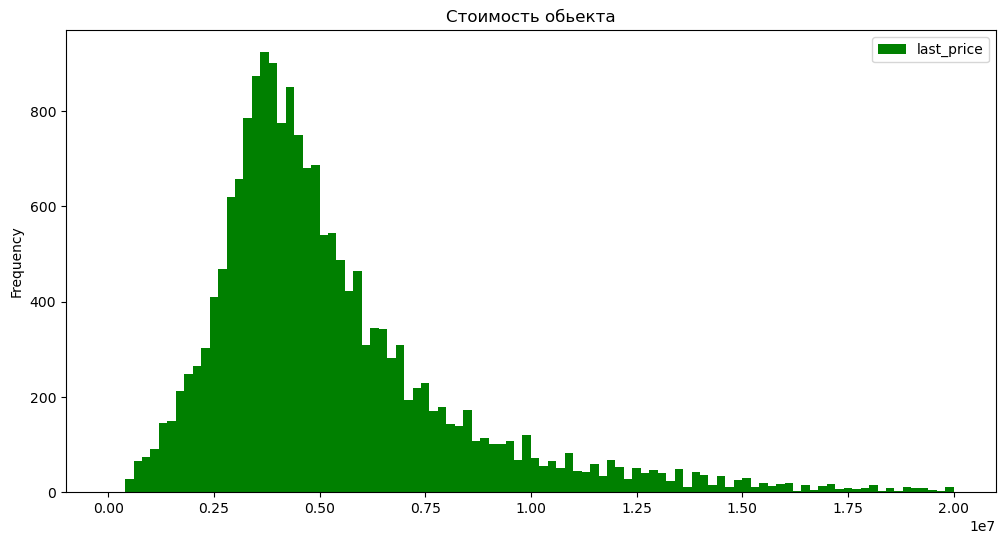

In [72]:
data['last_price'].plot(kind = 'hist', bins = 100, range = (0, 20000000),figsize = (12,6), title = 'Стоимость обьекта', legend = 'last_price', color = 'green')

- По цене на момент снятия публикации видно, что распределение напрминает 'колокол', что говорит нам о распределении Гауса, 
  границы от 430тыс. до 124 миллионов, среднее ~6 миллонов, и медианное значение ~ 5 миллионов.

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

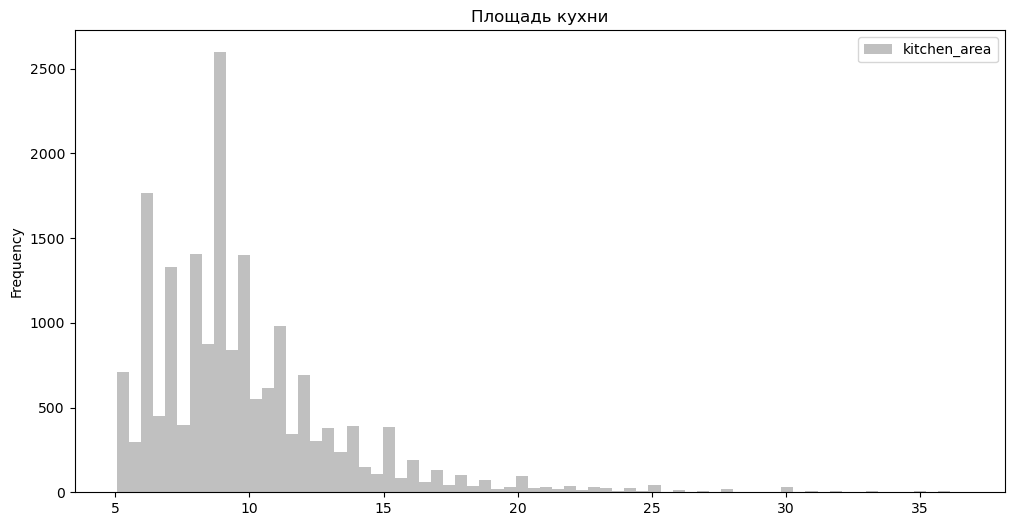

In [73]:
data['kitchen_area'].plot(kind = 'hist', bins = 70, figsize = (12,6), title = 'Площадь кухни', legend = 'kitchen_area', color = 'silver')

* По графику площади кухни, видно распределение данных нормальное Гауса, диапозон выборки от 5 до 36 м2, среднее значение 10 м2, и медианное значение 9 м2.
* Гистограмма жилой площади показывает нам, что от 8 до 18 м2 имеется учищении частоты значений, а потом подение. Диапазон выборки от 8 до 109 м2, среднее значение 32 м2 и медианна 30 м2.

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

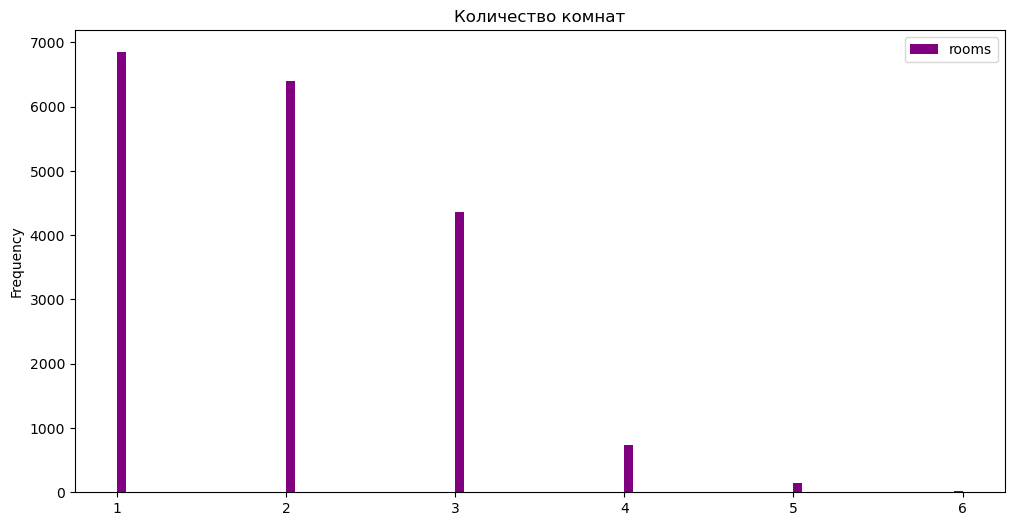

In [74]:
data['rooms'].plot(kind = 'hist', bins = 100, figsize = (12,6), title = 'Количество комнат', legend = 'rooms', color = 'purple')

- Гистограмма по комнатам несемметрична показывает нам, что большая часть недвижимости приходиться на однакомнатные, двухкомнатные и трехкомнатные квартиры. Диапозон выборки от 1 до 6 комнат, среднее и медианна 2 комнаты.

<AxesSubplot:title={'center':'Высота потолков '}, ylabel='Frequency'>

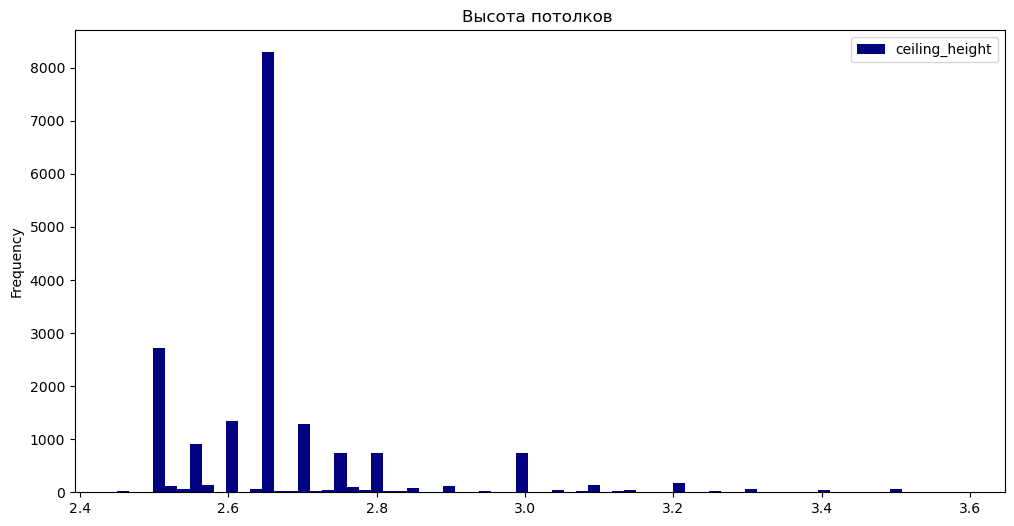

In [75]:
data['ceiling_height'].plot(kind = 'hist', bins = 70, figsize = (12,6), title = 'Высота потолков ', legend = 'ceiling_height', color = 'navy')

- График высоты потолков больше похож на распределение Гауса, большая частотность в зоне 2,45 м, диапозон выборки от 2,49 до 3.6м, среднее и медианна в одной зоне 2,6.

<AxesSubplot:title={'center':'Этажи'}, ylabel='Frequency'>

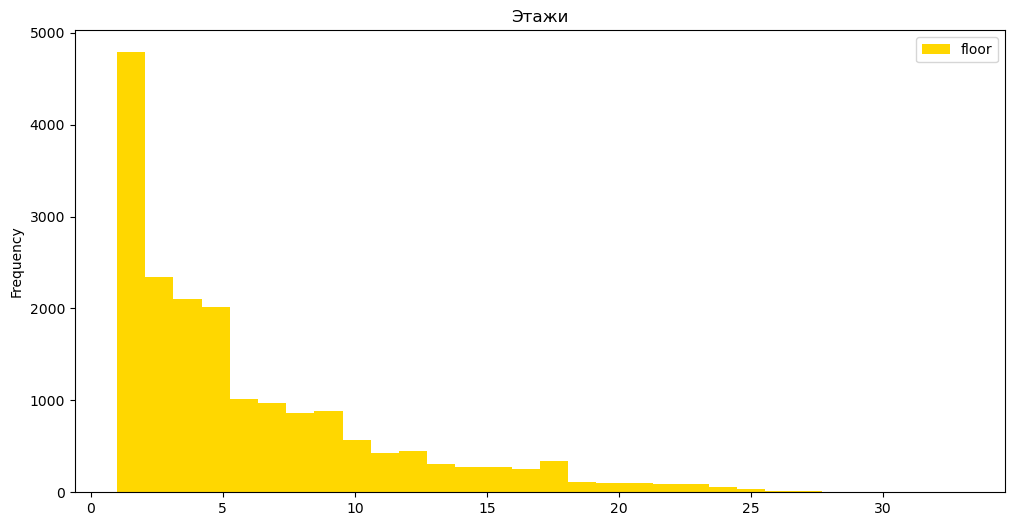

In [76]:
data['floor'].plot(kind = 'hist', bins = 30, figsize = (12,6), title = 'Этажи', legend = 'floor', color = 'gold')

* Гистограмма количества этажей в обьекте больше похожа на нормальное распределение Гауса, границы выборки от 1 до 60, среднее 11, медианное значение 9.

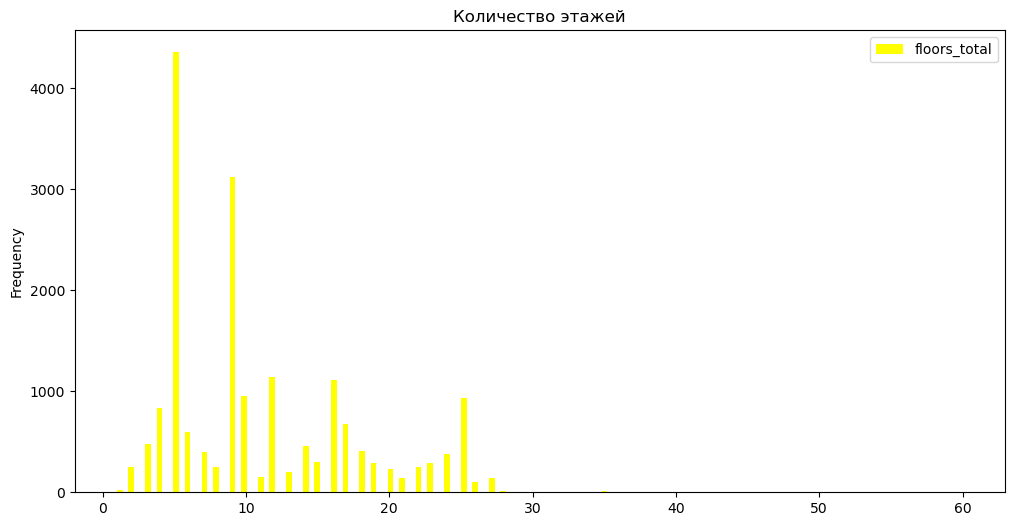

In [77]:
data['floors_total'].plot(kind = 'hist', bins = 150, figsize = (12,6), title = 'Количество этажей', legend = 'floors_total', color = 'yellow')
plt.show()

- По этажам видно что график несемметричен, диапозон выборки лежит от 1 до 33, среднее 6, медианна 5.

<AxesSubplot:>

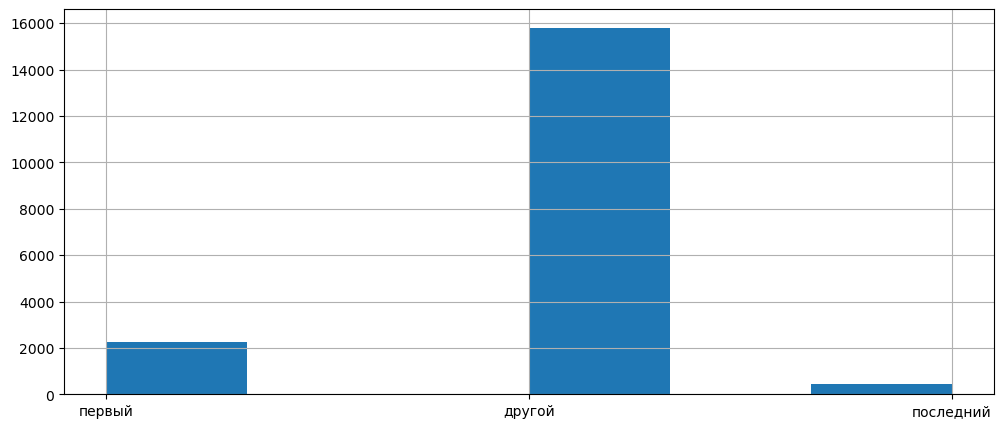

In [78]:
data['floor_type'].hist(bins=6, figsize = (12, 5))

* График по типу этажа, указывает на то, что обьекты недвижимости  на первом и  на последнем этаже дешевле чем на других.

<AxesSubplot:title={'center':'Дни недели'}, ylabel='Frequency'>

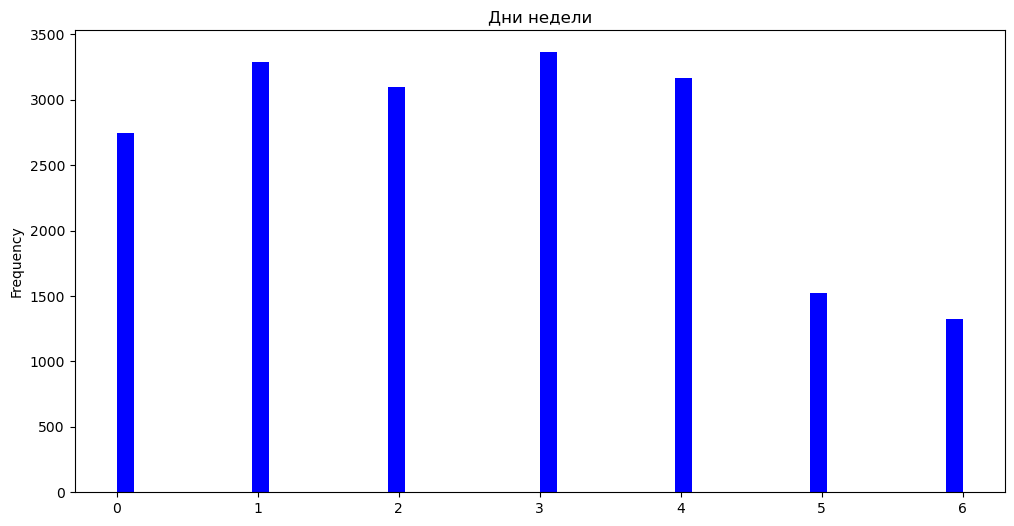

In [79]:
data['day_week_publ'].plot(kind = 'hist', bins = 50, figsize = (12,6), title = 'Дни недели', color = 'blue')


* По данному графику дней недели видно, что  во вторник и четверг большая частота публикаций обьявления.

<AxesSubplot:title={'center':'Месяца'}, ylabel='Frequency'>

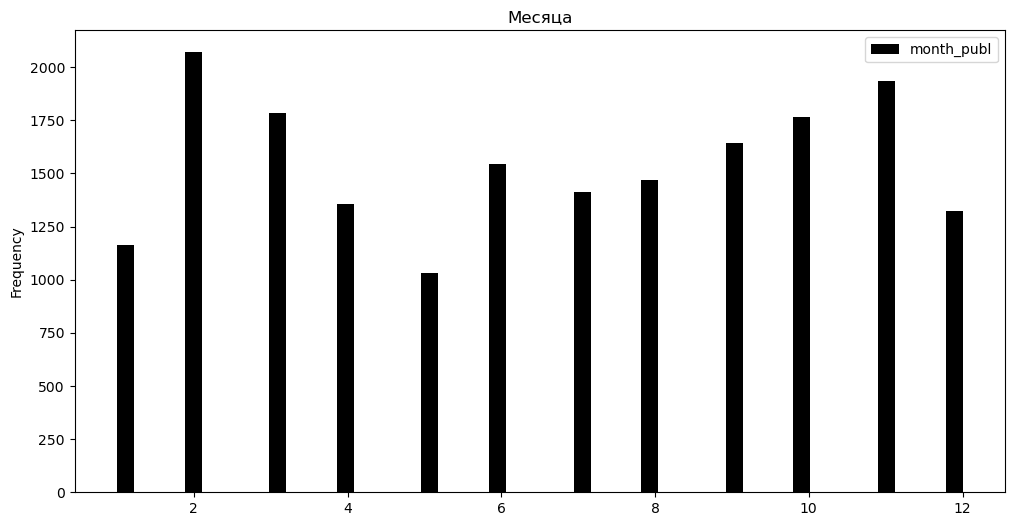

In [80]:
data['month_publ'].plot(kind = 'hist', bins = 50, figsize = (12,6), title = 'Месяца', legend = 'month_publ', color = 'black')

* Гистограмма частоты публикаций по месяцам, указывает нам на то, что в феврале и ноябре пиковые значения публикаций обьявлений.
Возможно потому-что это холодное время, так таковой зависимости не наблюдаю.

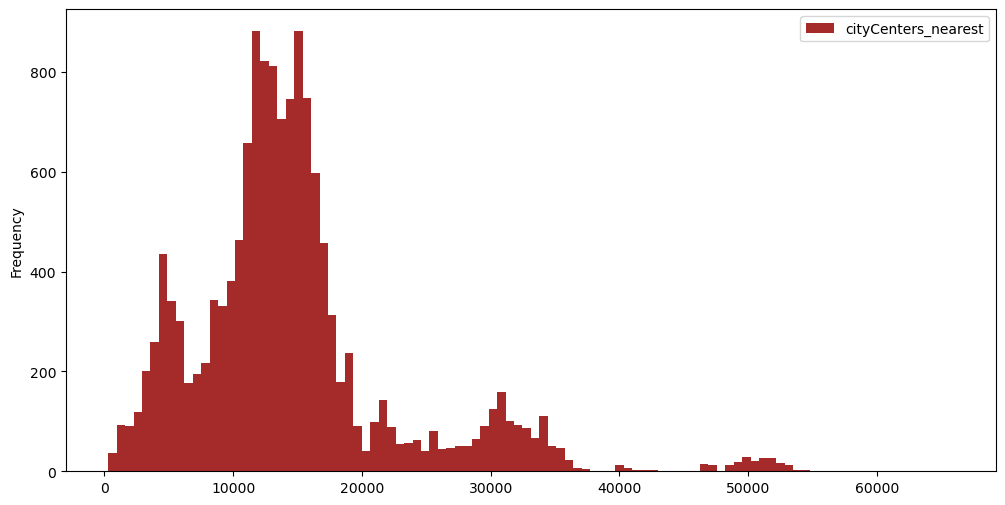

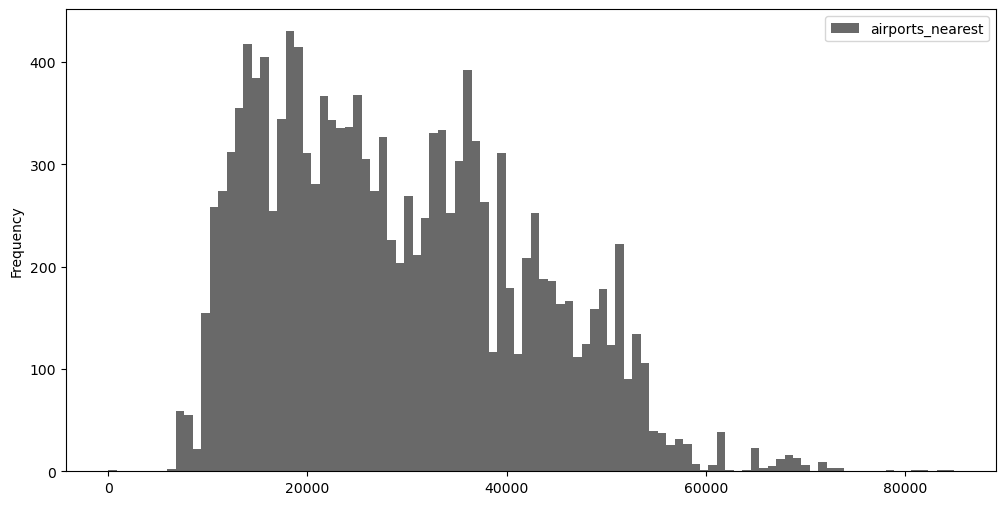

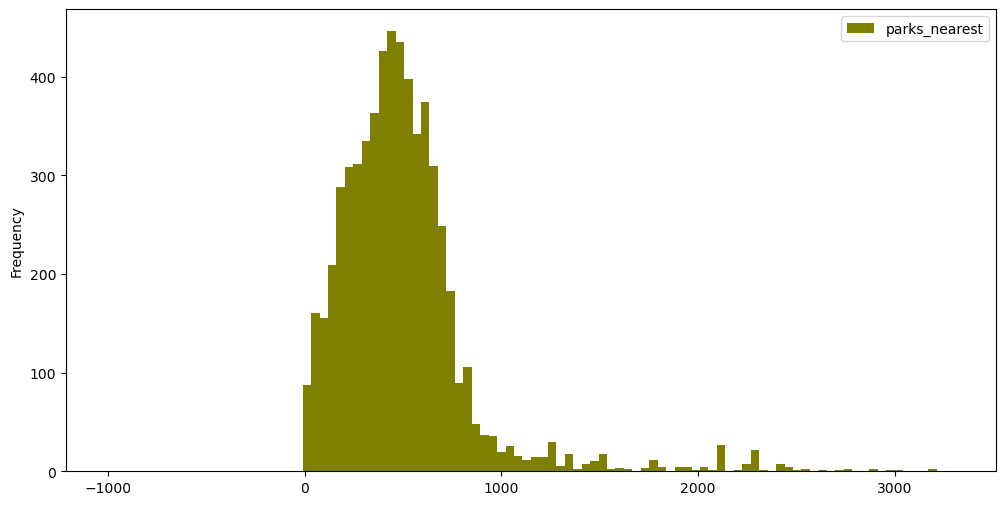

In [81]:
data['cityCenters_nearest'].plot(kind = 'hist', bins = 100, figsize = (12,6), legend = 'cityCenters_nearest', color = 'brown')
plt.show()
data['airports_nearest'].plot(kind = 'hist', bins = 100, figsize = (12,6), legend = 'airports_nearest', color = 'dimgray')
plt.show()
data['parks_nearest'].plot(kind = 'hist', bins = 100, range = (-1000, 3300 ), figsize = (12,6), legend = 'parks_nearest', color = 'olive')
plt.show()

- Что касается расстояний, гистограммы имеют нормальное распределение Гауса. График расстоянии до центра имеет диапозон выборки от 287 до 66000, среднее значение 14500 и медиана 13300, до аэропорта диапазон 0 до 84869, скорее всего 0 это выброс,  обьект возможно находится в пешей доступности и ни кто не придал значение такому маленькому значению для заполнения, среднее 29000, медианное значение 27200. На гистограмме расстояния до парка, явно видно выбивающиеся значения из основной массы, расстояние значительно дальше, в соотношении им меньше основной зоны распределения от 0 до 1000, среднее значение 500, медиана 3200.

***Построили отдельные гистограммы для каждого из заданных столбцов, выполним изучение графиков:***
  
  Изучение каждого параметра указывает на то что, в выборках есть нестандартные значения, выбывающиеся из нормальных, есть выбросы но они не сильно влияют на данные. Оставим все как есть.

**Изучим, как быстро продавались квартиры**

count   18504.00
mean      177.08
std       204.40
min         6.00
25%        45.00
50%        97.00
75%       229.00
max      1199.00
Name: days_exposition, dtype: float64

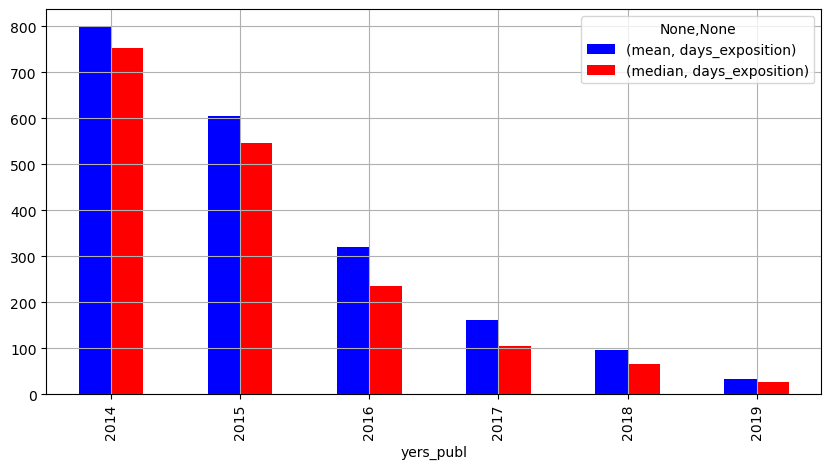

In [82]:
# Построим сводную таблицу, группируем по годам публикации и считаем среднее и медиану по количеству дней размещения публикации.
# Чтобы наглядно было видно скорость продаж, используем столбчатую диаграмму.
data.pivot_table(index = 'yers_publ', values = 'days_exposition', aggfunc = ['mean', 'median'])\
    .plot.bar(grid = True, figsize = (10, 5), color = ['blue', 'red'])
data['days_exposition'].describe()

**Начиная с 2014** года продажа недвижимости увеличивалась с каждым годом по 2019 год. 
Диапазон среднего срока продаж уменьшился в прогрессии с ~ 840 до 50 дней, вместе с ним и медианное значение с небольшой разницей.

<AxesSubplot:title={'center':'Скорость продаж'}, xlabel='Год продажи'>

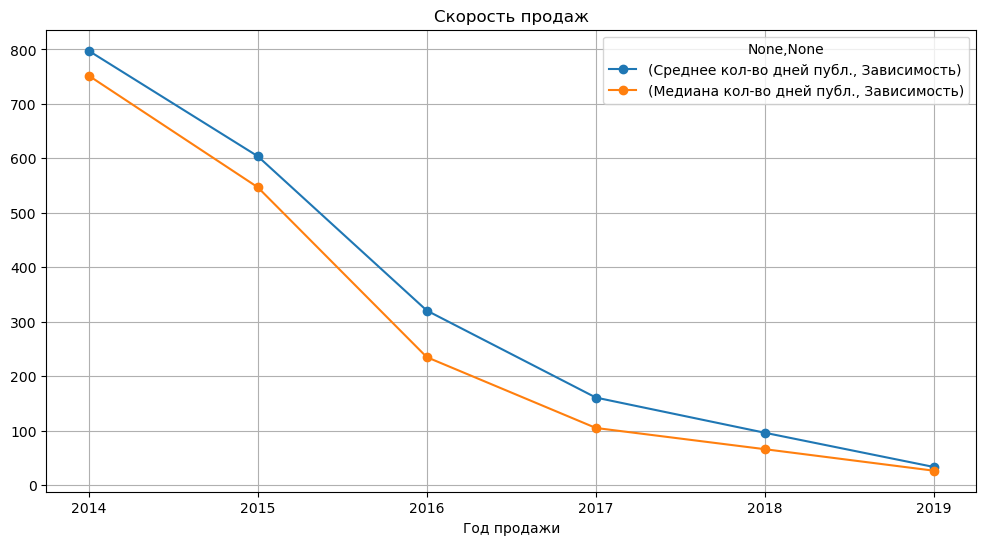

In [83]:
year_sale_obj = data.pivot_table(index = 'yers_publ', values = 'days_exposition', aggfunc = ['mean', 'median'])
year_sale_obj = year_sale_obj.rename(columns = {'days_exposition':'Зависимость'}, level = 1)
year_sale_obj = year_sale_obj.rename(columns = {'mean':'Среднее кол-во дней публ.', 'median':'Медиана кол-во дней публ.'},\
                                               level = 0)
year_sale_obj.index = year_sale_obj.index.rename('Год продажи')
year_sale_obj
year_sale_obj.plot(figsize = (12,6), title = 'Скорость продаж', grid = True, style = 'o-')

* Если брать среднее количество дней публикации обьявления за конкретный год, от момента начала публикации и до ее продажи квартиры, то можно наблюдать, что  в 2014 году продажи были необычно долгими так как обьвление в среднем было актуально 805 дней, что касается быстрых продаж, то 2018 и 2019 года были самыми быстрыми по продажам недвижимости.  

**Определяем какие факторы больше всего влияют на общую (полную) стоимость объекта**

In [84]:
# Для начала построим сводную таблицу по корреляции всех параметров на общую стоимость обьекта.
mat_corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr()
mat_corr

,last_price,total_area,living_area,kitchen_area
last_price,1.00,0.76,0.65,0.53
total_area,0.76,1.00,0.93,0.49
living_area,0.65,0.93,1.00,0.25
kitchen_area,0.53,0.49,0.25,1.00


**Зависимость стоимости обьекта от общей площади**

0.7615148873895646

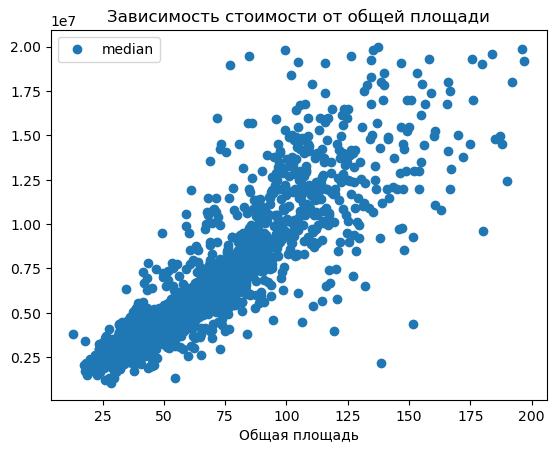

In [85]:
# Построим сводную таблтцу, переименуем индекс и уберем с нулевого уровня наименование.
piv_tab_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_tab_total_area.columns= ['count','mean', 'median']
piv_tab_total_area.index = piv_tab_total_area.index.rename('Общая площадь')
piv_tab_total_area.plot(y = 'median', style = 'o', title =  'Зависимость стоимости от общей площади')
data['total_area'].corr(data['last_price'])

* Можно увидить, что  взаимосвязь цены к общей площади имеет коэффициент Пирсона 0,76 ближе к еденицы - связь есть. По графику наглядно видно, что от увеличения площади обьекта увеличивается его стоимость. В зоне от 25 до 110 большая частотность обьектов. 

**Зависимость стоимости обьекта от жилой площади**

0.6532890813074368

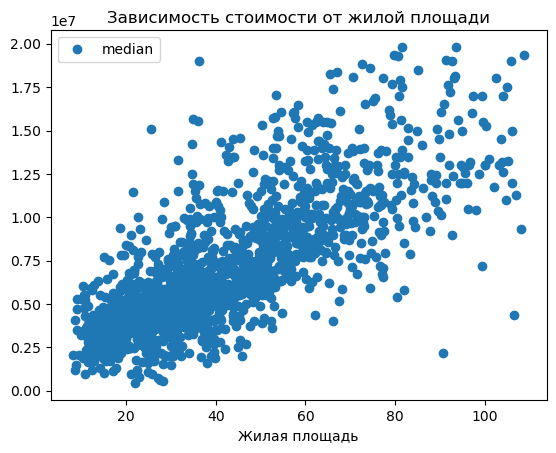

In [86]:
# Построим сводную таблтцу, переименуем индекс и уберем с нулевого уровня наименование.
piv_tab_liv_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_tab_liv_area.columns= ['count','mean', 'median']
piv_tab_liv_area.index = piv_tab_liv_area.index.rename('Жилая площадь')
piv_tab_liv_area.plot(y = 'median', style = 'o', title =  'Зависимость стоимости от жилой площади')
data['living_area'].corr(data['last_price'])

* Связь стоимости к жилой площади коэффициент Пирсона 0,65, также ближе к 1 связь есть. Тут также можем наблюдать увеличение стоимости относительно увеличения жилой площади.

**Зависимость стоимости обьекта от площади кухни**

0.5320900453878992

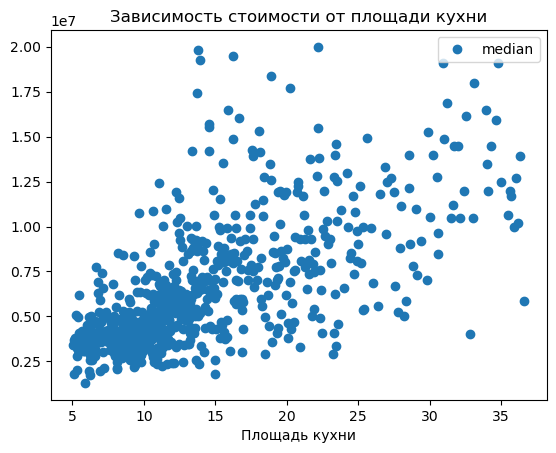

In [87]:
# Построим сводную таблтцу, переименуем индекс и уберем с нулевого уровня наименование.
piv_tav_kitch_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_tav_kitch_area.columns= ['count','mean', 'median']
piv_tav_kitch_area.index = piv_tav_kitch_area.index.rename('Площадь кухни')
piv_tav_kitch_area.plot(y = 'median', style = 'o', title =  'Зависимость стоимости от площади кухни')
data['kitchen_area'].corr(data['last_price'])

* Взаимосвязь стоимости к площади кухни ближе к 0.53 связь этих параметров меньше, но все же имеется, это видно по диаграмме в зоне от 5 до 15 кв.м.

**Зависимость стоимости от количества комнат**

0.49305294666217364

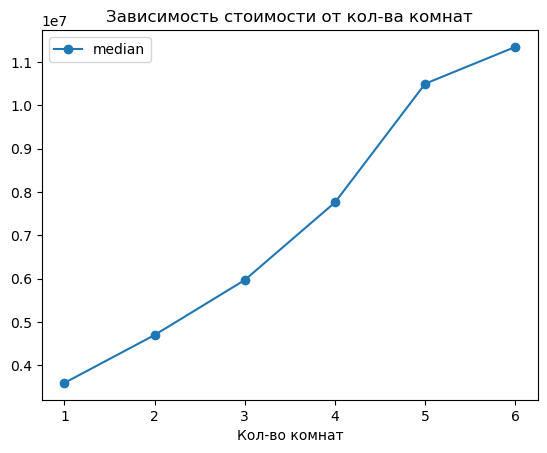

In [88]:
# Построим сводную таблтцу, переименуем индекс и уберем с нулевого уровня наименование.
piv_tav_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_tav_rooms.columns= ['count','mean', 'median']
piv_tav_rooms.index = piv_tav_rooms.index.rename('Кол-во комнат')
piv_tav_rooms.plot(y = 'median', style = '-o', title =  'Зависимость стоимости от кол-ва комнат')
data['rooms'].corr(data['last_price'])

* Линейная связь стоимости от кол-ва комнат слабая, но все же есть. Видно, что в квартирах с большим количеством комнат повышается цена.

**Зависимость стоимости от типа этажа**

<AxesSubplot:title={'center':'Зависимость стоимости от типа этажа'}, xlabel='Тип этажа'>

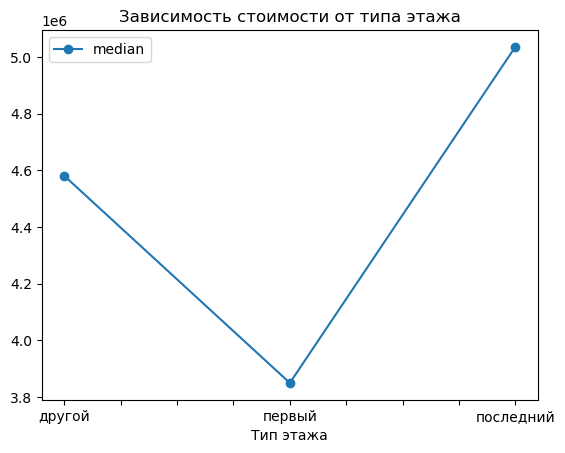

In [89]:
# Построим сводную таблтцу, переименуем индекс и уберем с нулевого уровня наименование.
piv_tav_floor = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_tav_floor.columns= ['count','mean', 'median']
piv_tav_floor.index = piv_tav_floor.index.rename('Тип этажа')
piv_tav_floor.plot(y = 'median', style = '-o', title = 'Зависимость стоимости от типа этажа')

* Те обьекты недвижимости, у которых первый этаж цена дешевле, а у квартир с последним этажем дороже.

**Зависимость стоимости от дня**

-0.008985944274626978

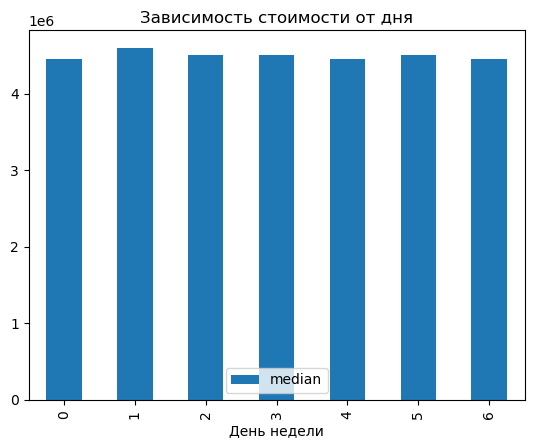

In [90]:
# Построим сводную таблтцу, переименуем индекс и уберем с нулевого уровня наименование.
piv_tav_day = data.pivot_table(index = 'day_week_publ', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_tav_day.columns= ['count','mean', 'median']
piv_tav_day.index = piv_tav_day.index.rename('День недели')
piv_tav_day.plot.bar(y = 'median', title =  'Зависимость стоимости от дня')
data['day_week_publ'].corr(data['last_price'])

* Корреляция Пирсона взаимосвязи стоимости от дня отсутствует, на это указывает коэфициент -0.008, и график.

**Зависимость стоимости от месяца**

0.01289172931928427

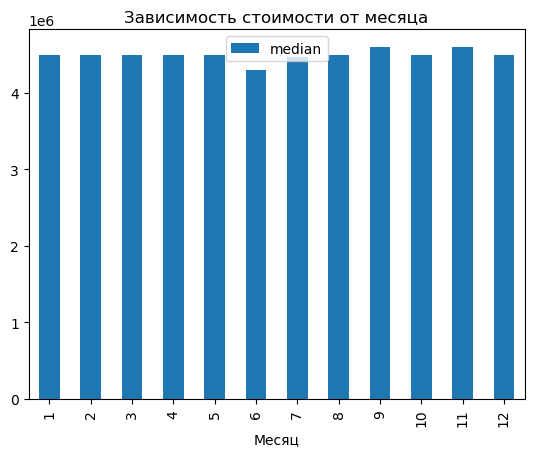

In [91]:
piv_tav_month = data.pivot_table(index = 'month_publ', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_tav_month.columns= ['count','mean', 'median']
piv_tav_month.index = piv_tav_month.index.rename('Месяц')
piv_tav_month.plot.bar(y = 'median', title =  'Зависимость стоимости от месяца')
data['month_publ'].corr(data['last_price'])

* Корреляция Пирсона взаимосвязи стоимости от месяца отсутствует, на это указывает коэфициент 0.01, и график.

**Зависимость стоимости от года**

-0.048570763454446476

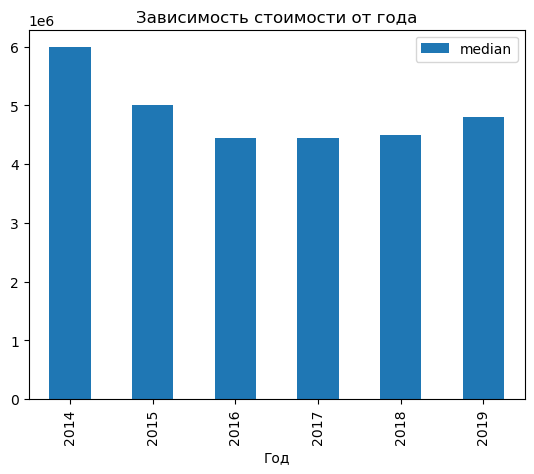

In [92]:
piv_tav_yers = data.pivot_table(index = 'yers_publ', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_tav_yers.columns= ['count','mean', 'median']
piv_tav_yers.index = piv_tav_yers.index.rename('Год')
piv_tav_yers.plot.bar(y = 'median', title =  'Зависимость стоимости от года')
data['yers_publ'].corr(data['last_price'])

* Коэффициент корреляции Писона, указывает на то, что линейная связь слабая либо отсутствует вовсе.

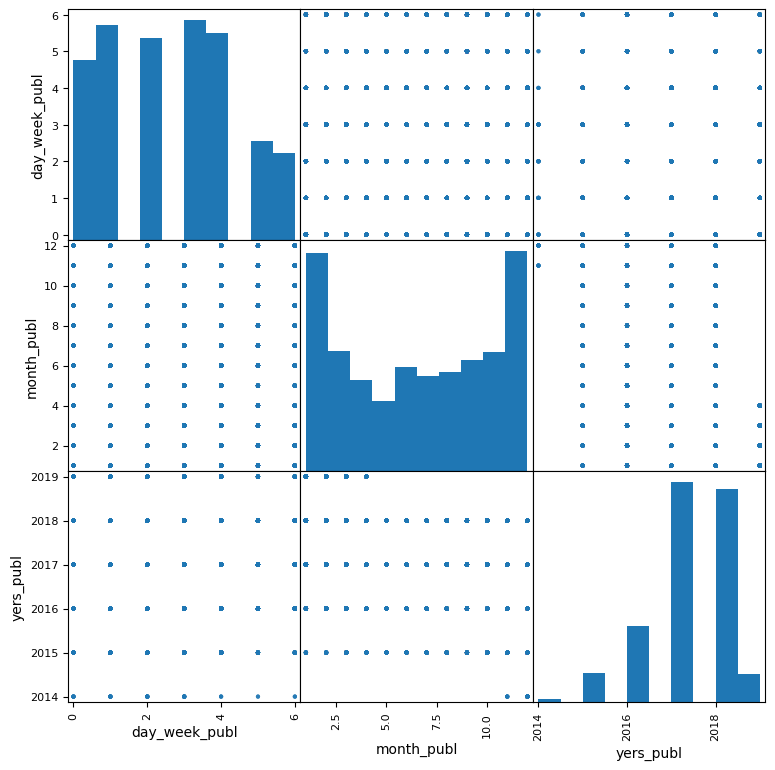

In [93]:
psm = data[['day_week_publ', 'month_publ', 'yers_publ']]
pd.plotting.scatter_matrix(psm, figsize=(9, 9));

**Посчитаим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [94]:
# Найдем уникальные значения в отсортированном порядке.
data['locality_name'].value_counts().head(10)

Санкт-Петербург    12215
Мурино               502
Кудрово              403
Шушары               387
Всеволожск           321
Колпино              290
Парголово            286
Пушкин               255
Гатчина              237
Выборг               185
Name: locality_name, dtype: int64

In [95]:
# Создадим сводную таблицу сгруппируем по докации, и зададим агрегатные функции.
# После, отсортируем по количеству обьявлений
# Присвоим логическим срезом, максимальное и минимальное значение.
sqr_price_locality = data.pivot_table(index = 'locality_name', values = 'price_sqr_m', aggfunc=['count', 'median'])
sqr_price_locality = sqr_price_locality.sort_values(('count', 'price_sqr_m'), ascending = False).head(10)
print(sqr_price_locality)
locality_ten_max = sqr_price_locality[sqr_price_locality[('median', 'price_sqr_m')]==sqr_price_locality[('median', 'price_sqr_m')].max()]
locality_ten_min = sqr_price_locality[sqr_price_locality[('median', 'price_sqr_m')]==sqr_price_locality[('median', 'price_sqr_m')].min()]


                      count      median
                price_sqr_m price_sqr_m
locality_name                          
Санкт-Петербург       12215   101965.60
Мурино                  502    83985.56
Кудрово                 403    94444.44
Шушары                  387    76562.50
Всеволожск              321    65789.47
Колпино                 290    74231.13
Парголово               286    91387.36
Пушкин                  255    99257.86
Гатчина                 237    68139.96
Выборг                  185    57352.94


In [96]:
# Максимальное
locality_ten_max

,count,median
,price_sqr_m,price_sqr_m
locality_name,,
Санкт-Петербург,12215,101965.60


In [97]:
# Минимальное
locality_ten_min

,count,median
,price_sqr_m,price_sqr_m
locality_name,,
Выборг,185,57352.94


<AxesSubplot:ylabel='locality_name'>

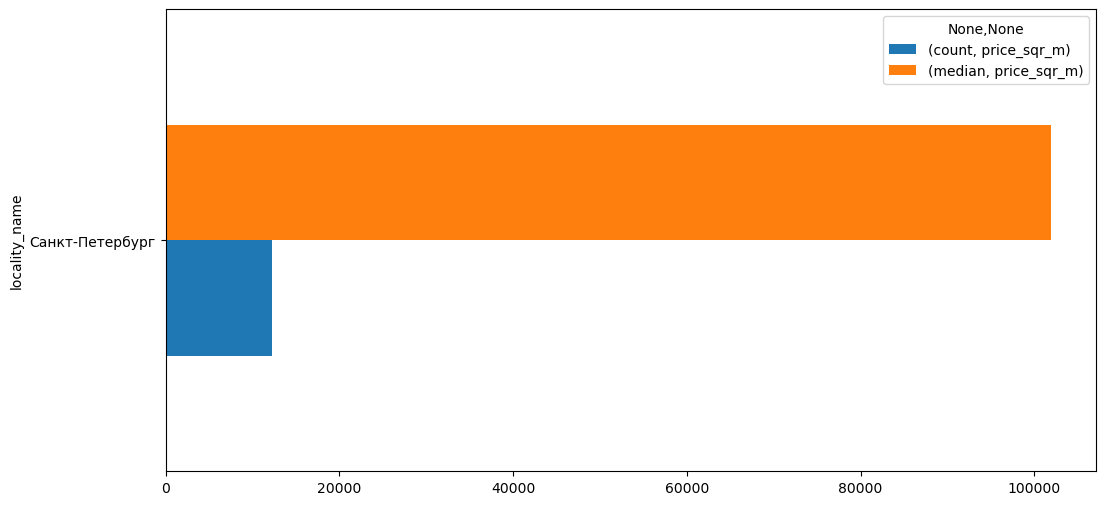

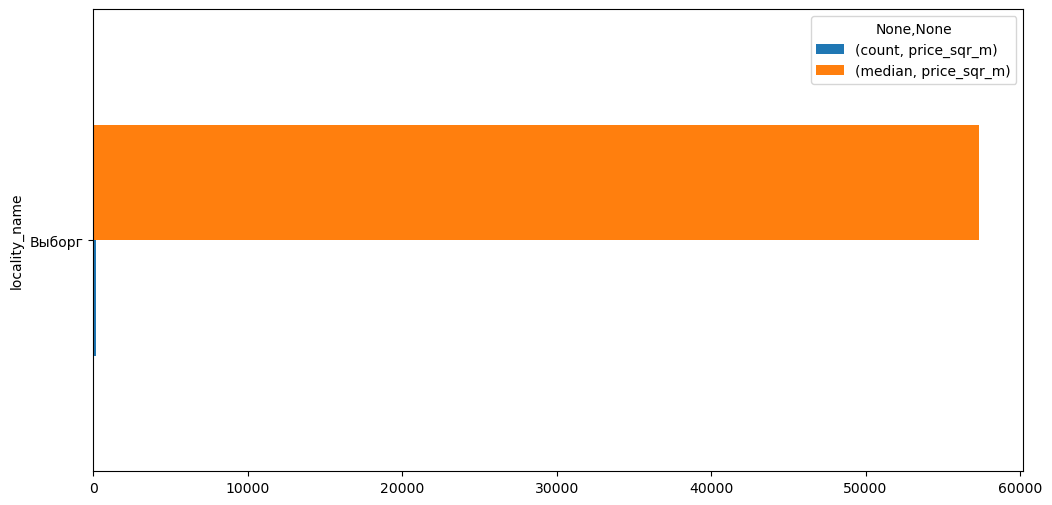

In [98]:
# Построим наглядные графики
locality_ten_max.plot(kind = 'barh', figsize =(12,6))
locality_ten_min.plot(kind = 'barh', figsize =(12,6))

* Населённый пункт с самой высокой стоимостью квадратного метра находится в Санкт - Петербурге, а самой низкой в Выборге.**

**Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра**

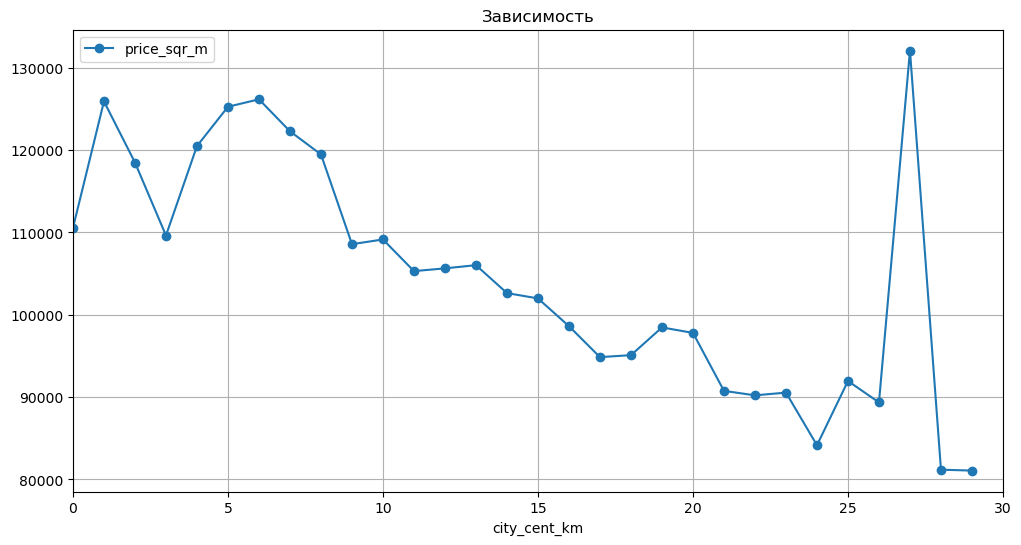

In [99]:
# Выполним срез по наименованию населенного пункта, создадим сводную таблицу, где подсчитаем среднюю цену каждого километра.
spb_avg_price_km = data.query('locality_name == "Санкт-Петербург"')\
                       .pivot_table(index = 'city_сent_km', values = 'price_sqr_m', aggfunc = 'mean')
spb_avg_price_km
spb_avg_price_km.plot(style = 'o-', xlim = (0,30), grid = True, figsize = (12,6), title = 'Зависимость');

In [100]:
# # Проанализировав график можно сказать, что в зоне от 26 до 28, есть упадок, скорее всего это выбросы, или аномальные значения.
data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_сent_km'] == 27)]
# Да верно, квартира с большой стоимостью выбивается, поэтому такой скачок.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_m,day_week_publ,month_publ,yers_publ,floor_type,city_сent_km
748,13,14350000,74.00,2017-11-28,2,3.13,5,30.00,3,False,False,False,25.00,0,Санкт-Петербург,23888.00,27313.00,1.00,1496.00,0.00,NaN,128.00,193918.92,1,11,2017,другой,27.00
5961,6,2250000,32.00,2018-02-27,1,2.65,2,16.50,2,False,False,False,7.00,0,Санкт-Петербург,24006.00,27431.00,0.00,NaN,0.00,NaN,178.00,70312.50,1,2,2018,другой,27.00


In [101]:
# 
data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_сent_km'] == 3)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqr_m,day_week_publ,month_publ,yers_publ,floor_type,city_сent_km
99,32,9600000,90.00,2017-09-26,4,2.65,5,67.00,2,False,False,False,8.00,0,Санкт-Петербург,23277.00,2818.00,0.00,NaN,0.00,NaN,104.00,106666.67,1,9,2017,другой,3.00
138,8,4800000,40.00,2017-11-18,2,2.65,3,29.00,2,False,False,False,6.00,0,Санкт-Петербург,23371.00,2913.00,0.00,NaN,2.00,729.00,80.00,120000.00,5,11,2017,другой,3.00
201,5,10880000,123.10,2015-11-12,6,3.20,5,89.00,2,False,False,False,11.00,0,Санкт-Петербург,26009.00,3369.00,2.00,516.00,0.00,NaN,992.00,88383.43,3,11,2015,другой,3.00
316,11,5650000,46.30,2017-03-13,2,2.65,6,28.80,2,False,False,False,9.00,0,Санкт-Петербург,31327.00,3144.00,0.00,NaN,0.00,NaN,89.00,122030.24,0,3,2017,другой,3.00
404,2,11400000,81.20,2016-04-27,3,2.65,3,45.70,2,False,False,False,14.30,0,Санкт-Петербург,23128.00,2669.00,0.00,NaN,3.00,611.00,89.00,140394.09,2,4,2016,другой,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23176,2,6800000,69.20,2017-11-14,3,2.90,5,39.90,4,False,False,False,9.10,0,Санкт-Петербург,21523.00,3485.00,2.00,436.00,1.00,666.00,447.00,98265.90,1,11,2017,другой,3.00
23178,7,5950000,60.00,2018-02-01,3,2.80,5,42.00,1,False,False,False,8.00,0,Санкт-Петербург,23609.00,3151.00,0.00,NaN,0.00,NaN,85.00,99166.67,3,2,2018,первый,3.00
23387,7,5600000,50.00,2017-08-21,1,2.65,5,27.00,1,False,False,False,10.00,0,Санкт-Петербург,19585.00,2659.00,1.00,394.00,3.00,56.00,45.00,112000.00,0,8,2017,первый,3.00
23430,18,5260000,38.00,2018-11-06,1,3.30,5,16.00,1,False,False,False,12.00,0,Санкт-Петербург,24675.00,3441.00,2.00,538.00,1.00,466.00,12.00,138421.05,1,11,2018,первый,3.00


**В зоне 3 километров распологается центр города, это можно сверить со столбцом "cityCenters_nearest"**

### Общий вывод

- Был открыт файл с данными с сервиса Яндекс.Недвижимость, архив обновлений за несколько лет о продажи квартир, изучен и построили гистограммы для изучения общей информации.
- Найдены и заполнены пропущенные значения, где возможно. Преобразован тип данных там, где было нужно. Устранили неявные дубликаты в населенных пунктах, найдены и устранены редкие и выбивающиеся значения, аномалии в таких параметрах как высота потолков, общая площадь квартиры, количество комнат, количество дней с начала публикации, жилая площадь, площадь кухни. Добавили в таблицу такие параметры как цена одного квадратного метра, день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой») и расстояние до центра города в километрах.
- Провели исследовательский анализ данных путем построения графиков для каждого параметра, где определили диапозоны выборок, типы распеделения, и на то что, в выборках есть нестандартные значения, выбывающиеся из нормальных, есть выбросы но они не сильно влияют на данные.
- Изучили как быстро продовались квартиры и определили, что начиная с 2014 года продажа недвижимости увеличивалась с каждым годом по 2019 год. Диапазон среднего срока продаж уменьшился в прогрессии с ~ 840 до 50 дней, вместе с ним и медианное значение с небольшой разницей.
- Определили какие факторы влияют на полную стоимость обьекта. Построили матрицу диаграмм рассеяния. Определили взаимосвязь цены к общей площади имеющее коэффициент Пирсона 0,71 ближе к еденицы - связь есть. Связь стоимости к жилой площади коэффициент 0,61, также ближе к 1 связь есть хоть и не большая, взаимосвязь стоимости к площади кухни ближе к 0, связь этих параметров меньше.
- Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и определили, что населённый пункт с самой высокой стоимостью квадратного метра находится в Санкт - Петербурге, а самой низкой в Выборге.
- Нашли квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Построили график  где можно сказать, что в зоне от 26 до 28, есть упадок, скорее всего это выбросы, или аномальные значения. Квартира с большой стоимостью выбивается, поэтому есть такой скачок. Определили квартиры находящиеся в Санкт-Петербурге  в радиусе 3 км. При увеличении расстояния от центра СПБ, стоимость уменьшается.